<a href="https://colab.research.google.com/github/roklp/MLP34/blob/main/ML_boxcox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#pip install statsmodels

In [4]:
# pip install scikit-learn

In [5]:
import warnings

# 경고 무시
warnings.filterwarnings("ignore")

In [6]:
# 폰트 설정
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [7]:
import pandas as pd
import numpy as np

In [8]:
data = pd.read_csv('/content/drive/MyDrive/data/머신러닝/data/final_merged_update_store_age_df.csv')

In [9]:
# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)

In [10]:
data.shape

(3930, 41)

In [11]:
list(data.columns)

['기준_년',
 '기준_분기',
 '상권_구분_코드_명',
 '상권_코드',
 '상권_코드_명',
 '자치구_코드',
 '자치구_코드_명',
 '행정동_코드',
 '행정동_코드_명',
 '시간대',
 '시간대_매출금액',
 '시간대_유동인구_수',
 '평일_유동인구_수_평균',
 '주말_유동인구_수_평균',
 '총_직장_인구_수',
 '연령대_10_직장인구_비율',
 '연령대_20_직장인구_비율',
 '연령대_30_직장인구_비율',
 '연령대_40_직장인구_비율',
 '연령대_50_직장인구_비율',
 '연령대_60_이상_직장_인구_비율',
 '총_상주인구_수',
 '연령대_10_상주인구_비율',
 '연령대_20_상주인구_비율',
 '연령대_30_상주인구_비율',
 '연령대_40_상주인구_비율',
 '연령대_50_상주인구_비율',
 '연령대_60_이상_상주인구_비율',
 '총_가구_수',
 '집객시설_수',
 '월_평균_소득_금액',
 '소득_구간_코드',
 '지출_총금액',
 '점포_수',
 '유사_업종_점포_수',
 '개업_율',
 '개업_점포_수',
 '폐업_률',
 '폐업_점포_수',
 '프랜차이즈_점포_수',
 '영역_면적']

In [12]:
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드,상권_코드_명,자치구_코드,자치구_코드_명,행정동_코드,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,평일_유동인구_수_평균,주말_유동인구_수_평균,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,소득_구간_코드,지출_총금액,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,영역_면적
0,2021,1,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,00~06,377166450.0,738999.0,411342.0,387722.5,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0
1,2021,1,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,06~11,222467605.0,621019.0,411342.0,387722.5,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0
2,2021,1,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,11~14,192457360.0,351383.0,411342.0,387722.5,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0
3,2021,1,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,14~17,230188421.0,342564.0,411342.0,387722.5,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0
4,2021,1,골목상권,3110955,논현초등학교,11680.0,강남구,11680521.0,논현1동,17~21,531497598.0,433632.0,411342.0,387722.5,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,6.0,4.481561e+09,2.0,14.0,0.0,0.0,14.0,2.0,12.0,190913.0


### 우선 통계 분석에 불필요한 데이터 제외

In [13]:
data = data.drop(columns=['상권_코드', '자치구_코드', '행정동_코드', '자치구_코드_명', '평일_유동인구_수_평균', '주말_유동인구_수_평균', '소득_구간_코드', '점포_수', '개업_율', '폐업_률', '프랜차이즈_점포_수'])
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0


# EDA

#### 2021 ~ 2023년 분기별 편의점 수

In [14]:
# 데이터프레임에서 필요한 열만 추출
data_count = data[['기준_년', '기준_분기', '상권_코드_명', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수']]

# 기준_년과 기준_분기별로 유사_업종_점포_수와 개업_점포_수의 고유값(unique value) 및 합을 계산
unique_and_sum_by_year_quarter = data_count.groupby(['기준_년', '기준_분기', '상권_코드_명']).agg({'유사_업종_점포_수': lambda x: x.unique().sum(), '개업_점포_수': lambda x: x.unique().sum(), '폐업_점포_수': lambda x: x.unique().sum(), '유사_업종_점포_수': 'sum', '개업_점포_수': 'sum', '폐업_점포_수': 'sum'})

# 기준_년과 기준_분기별로 유사_업종_점포_수와 개업_점포_수의 합을 계산
sum_by_year_quarter = unique_and_sum_by_year_quarter.groupby(['기준_년', '기준_분기']).sum()

# 결과 출력
sum_by_year_quarter

유사_업종_점포_수  개업_점포_수  폐업_점포_수
기준_년 기준_분기                              
2021 1          4920.0    150.0    168.0
     2          4962.0    192.0    174.0
     3          4890.0     96.0    180.0
     4          4896.0    108.0    126.0
2022 1          4854.0     48.0     90.0
     2          4776.0     60.0    138.0
     3          4728.0     78.0    126.0
     4          4698.0     84.0    126.0
2023 1          4698.0    102.0    102.0
     2          4746.0    144.0     96.0
     3          4686.0     90.0    126.0

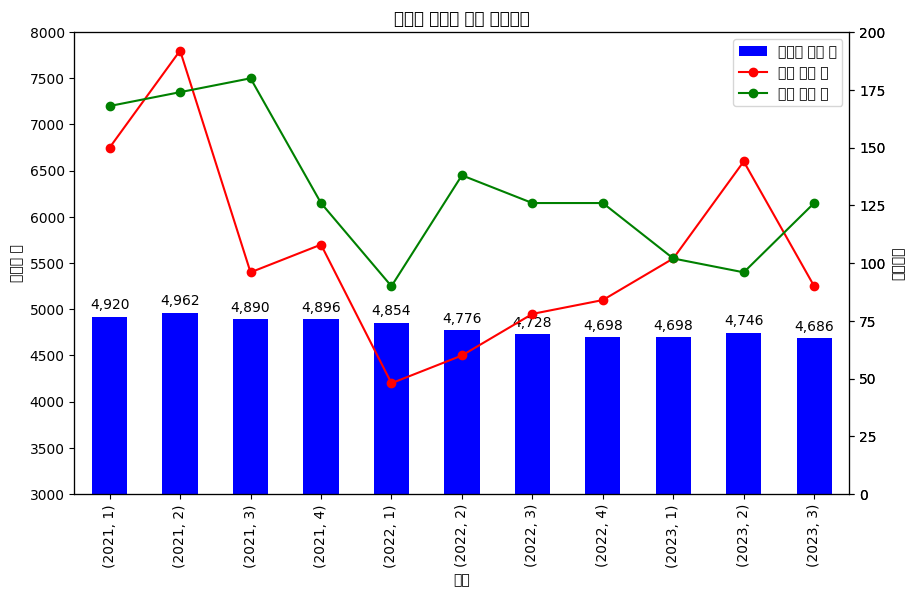

In [15]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 막대 그래프 그리기 (유사 업종 점포 수)
ax1 = plt.subplot()
sum_by_year_quarter['유사_업종_점포_수'].plot(kind='bar', color='blue', label='편의점 점포 수', ax=ax1)

# 선 그래프 그리기 (개업 점포 수)
ax2 = ax1.twinx()  # 같은 x축을 사용하는 새로운 서브플롯 생성
sum_by_year_quarter['개업_점포_수'].plot(kind='line', color='red', marker='o', label='개업 점포 수', ax=ax2)

# 두 번째 선 그래프 그리기 (폐업 점포 수)
ax3 = ax1.twinx()  # 같은 x축을 사용하는 새로운 서브플롯 생성
sum_by_year_quarter['폐업_점포_수'].plot(kind='line', color='green', marker='o', label='폐업 점포 수', ax=ax3)

# y 축 범위 설정
ax1.set_ylim(3000, 8000)  # 막대 그래프의 y 축 범위 설정
ax2.set_ylim(0, 200)  # 첫 번째 선 그래프의 y 축 범위 설정
ax3.set_ylim(0, 200)  # 두 번째 선 그래프의 y 축 범위 설정

# y 축 간격 설정
ax1.yaxis.set_ticks(np.arange(3000, 8001, step=500))  # y 축 간격을 500으로 설정

# 막대에 숫자 표시
for i, v in enumerate(sum_by_year_quarter['유사_업종_점포_수']):
    ax1.text(i, v + 50, '{:,.0f}'.format(v), ha='center', va='bottom')

# 그래프 제목과 축 이름 설정
plt.title('분기별 편의점 수와 개폐업수')
ax1.set_xlabel('분기')
ax1.set_ylabel('편의점 수')
ax2.set_ylabel('개폐업수')

# 범례 항목 생성
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper right')

# x축 눈금 라벨 회전
plt.xticks(rotation=00)

# 그래프 표시
plt.show()

- 분기마다 대부분 편의점 개업 점포 수보다 폐업 점포 수가 더 많음
- 편의점 수는 조금씩 줄어드는 추이를 보이나, 거의 비슷한 수준 기록 중

#### 2021 ~ 2023년 분기별 편의점 매출 추이

In [16]:
# 각 연도별 분기별 시간대_매출금액의 합 계산
for year in [2021, 2022, 2023]:
    max_quarter = 4 if year !=2023 else 3
    for quarter in range(1, max_quarter + 1):
        total_sales_amount = data[(data['기준_년'] == year) & (data['기준_분기'] == quarter)]['시간대_매출금액'].sum()
        print(f"{year}년 {quarter}분기 시간대_매출금액의 합:", total_sales_amount)

2021년 1분기 시간대_매출금액의 합: 112464080990.0
2021년 2분기 시간대_매출금액의 합: 130844020184.0
2021년 3분기 시간대_매출금액의 합: 137348888869.0
2021년 4분기 시간대_매출금액의 합: 139954234887.0
2022년 1분기 시간대_매출금액의 합: 133727630001.0
2022년 2분기 시간대_매출금액의 합: 151676013797.0
2022년 3분기 시간대_매출금액의 합: 164666343615.0
2022년 4분기 시간대_매출금액의 합: 162682197336.0
2023년 1분기 시간대_매출금액의 합: 155556408835.0
2023년 2분기 시간대_매출금액의 합: 163228898761.0
2023년 3분기 시간대_매출금액의 합: 167533960003.0


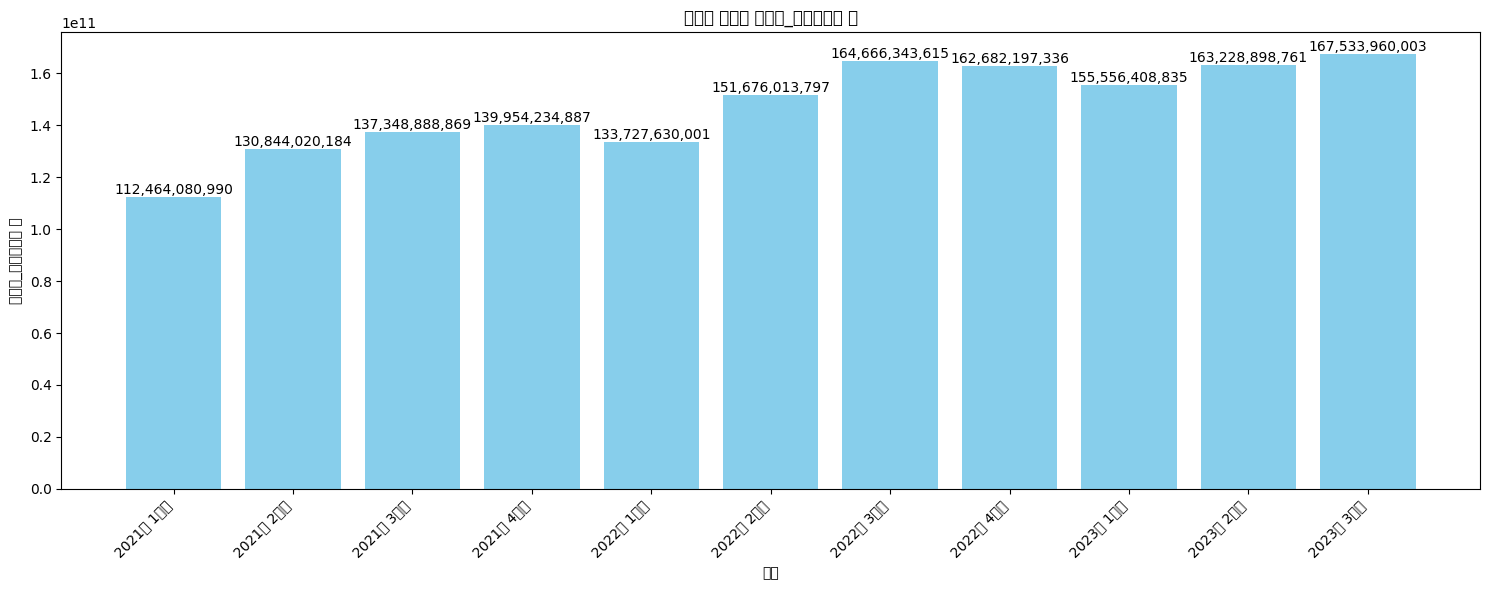

In [17]:
import matplotlib.pyplot as plt
import locale

# 각 연도별 분기별 시간대_매출금액의 합 계산
result = {}
for year in [2021, 2022, 2023]:
    max_quarter = 4 if year !=2023 else 3
    for quarter in range(1, max_quarter + 1):
        total_sales_amount = data[(data['기준_년'] == year) & (data['기준_분기'] == quarter)]['시간대_매출금액'].sum().astype(float)
        result[f"{year}년 {quarter}분기"] = total_sales_amount

# 결과를 막대 그래프로 표시
plt.figure(figsize=(15, 6))
bars = plt.bar(result.keys(), result.values(), color='skyblue')
plt.xlabel('분기')
plt.ylabel('시간대_매출금액의 합')
plt.title('연도별 분기별 시간대_매출금액의 합')
plt.xticks(rotation=45, ha='right')

# 각 막대에 숫자 표시 (회계 형식)
for bar in bars:
    yval = bar.get_height()
    formatted_val = '{:,.0f}'.format(yval)
    plt.text(bar.get_x() + bar.get_width()/2, yval, formatted_val, va='bottom', ha='center')


plt.tight_layout()
plt.show()

- 위의 그래프에서 편의점 수는 조금씩 줄어드는 추이를 보였으나, 반면에 매출 금액은 조금씩 증가하는 추이 기록

### 시간대별 평균 매출과 평균 유동인구수

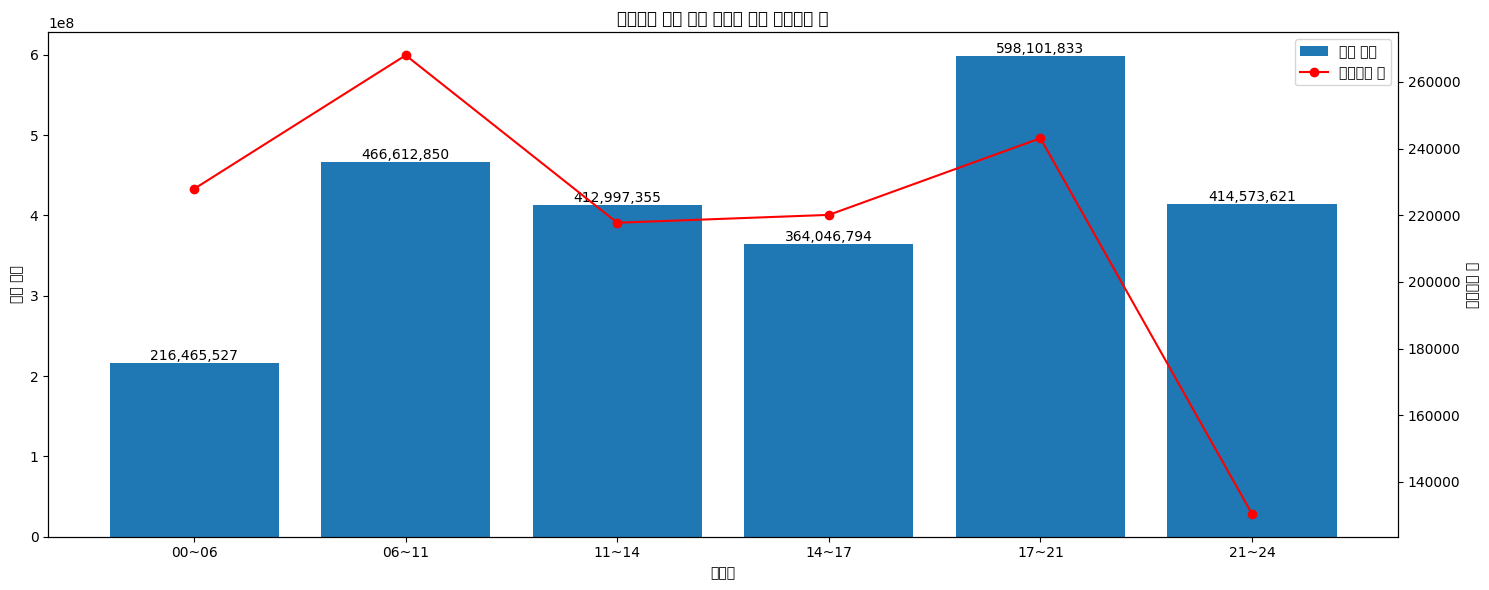

In [18]:
# 시간대별 매출 금액 합산
time_sales_revenue = data.groupby('시간대')['시간대_매출금액'].mean()

# 시간대별 유동인구 합산
time_sales_population = data.groupby('시간대')['시간대_유동인구_수'].mean()

# 그래프 시각화
fig, ax1 = plt.subplots(figsize=(15, 6))

# 막대 그래프 (매출 금액)
color = 'tab:blue'
ax1.set_xlabel('시간대')
ax1.set_ylabel('매출 금액')
ax1.bar(time_sales_revenue.index, time_sales_revenue, color=color, label='매출 금액')
ax1.tick_params(axis='y')

# 선 그래프 (유동인구 수)
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('유동인구 수')
ax2.plot(time_sales_population.index, time_sales_population, color=color, marker='o', label='유동인구 수')
ax2.tick_params(axis='y')

# 그래프 제목
plt.title('시간대별 평균 매출 금액과 평균 유동인구 수')

# 막대에 숫자 표시
for i, v in enumerate(time_sales_revenue):
    ax1.text(i, v, '{:,.0f}'.format(v), ha='center', va='bottom', color='black')

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# x 축 라벨 회전
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


- 출퇴근 시간에 높은 매출을 기록
- 비교적 유동인구가 많을 때 매출이 증가하지만, 21~24 구간대는 유동인구가 크게 줄어들지만 매출은 출퇴근 시간 다음으로 많은 매출을 기록
- 유동인구 수 외에도 다른 변수들이 시간대 매출에 영향을 끼칠 것으로 예상

### 2021~ 2023년 3분기 기준 상권별 점포당 분기 평균 매출액과 분기 평균 점포수

In [19]:
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0


In [20]:
data['시간대별_점포당_매출액'] = data['시간대_매출금액']/data['유사_업종_점포_수']
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적,시간대별_점포당_매출액
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,2.694046e+07
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.589054e+07
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.374695e+07
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.644203e+07
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,3.796411e+07


In [21]:
# 데이터프레임에서 필요한 열만 추출
data_venue = data[['상권_코드_명', '시간대', '시간대별_점포당_매출액']]

# 상권_코드_명별 시간대별_점포당_매출액의 합 구하기
sum_by_market = data_venue.groupby('상권_코드_명')['시간대별_점포당_매출액'].sum()/11

# 점포당 매출 금액이 큰 상권순으로 데이터 확인
sum_by_market = sum_by_market.sort_values(ascending=False)

# 데이터프레임으로 변환
sum_by_market = pd.DataFrame({'상권별_점포당_분기_평균_매출액': sum_by_market})


sum_by_market

,상권별_점포당_분기_평균_매출액
상권_코드_명,
경복아파트교차로,4.698162e+08
수서역,3.547284e+08
윗방죽마을공원,3.447542e+08
대청초등학교,3.281099e+08
매봉역 1번,3.174447e+08
언북중학교,3.064642e+08
은마아파트,2.950446e+08
"강남구청(청담역_8번, 강남세무서)",2.813380e+08
선정릉역 4번,2.690999e+08


In [22]:
# 상권별 분기 평균 점포수
# 데이터프레임에서 필요한 열만 추출
data_q_store = data[['기준_년','기준_분기', '상권_코드_명', '유사_업종_점포_수']]

# 상권_코드_명별 시간대별_점포당_매출액의 합 구하기
data_q_store = data_q_store.groupby(['기준_년', '기준_분기', '상권_코드_명'])['유사_업종_점포_수'].unique()

# 상권 코드별로 분기 평균 유사 업종 점포 수 계산
avg_q_store = data_q_store.groupby('상권_코드_명').mean().apply(lambda x: x[0])


# 데이터프레임으로 변환
avg_q_store = pd.DataFrame(avg_q_store)

# avg_q_store의 순서를 sum_by_market과 동일하게 정렬
avg_q_store = avg_q_store.reindex(sum_by_market.index)

# 결과 확인
avg_q_store

,유사_업종_점포_수
상권_코드_명,
경복아파트교차로,7.454545
수서역,13.000000
윗방죽마을공원,4.181818
대청초등학교,9.272727
매봉역 1번,3.100000
언북중학교,3.000000
은마아파트,15.818182
"강남구청(청담역_8번, 강남세무서)",9.090909
선정릉역 4번,7.000000


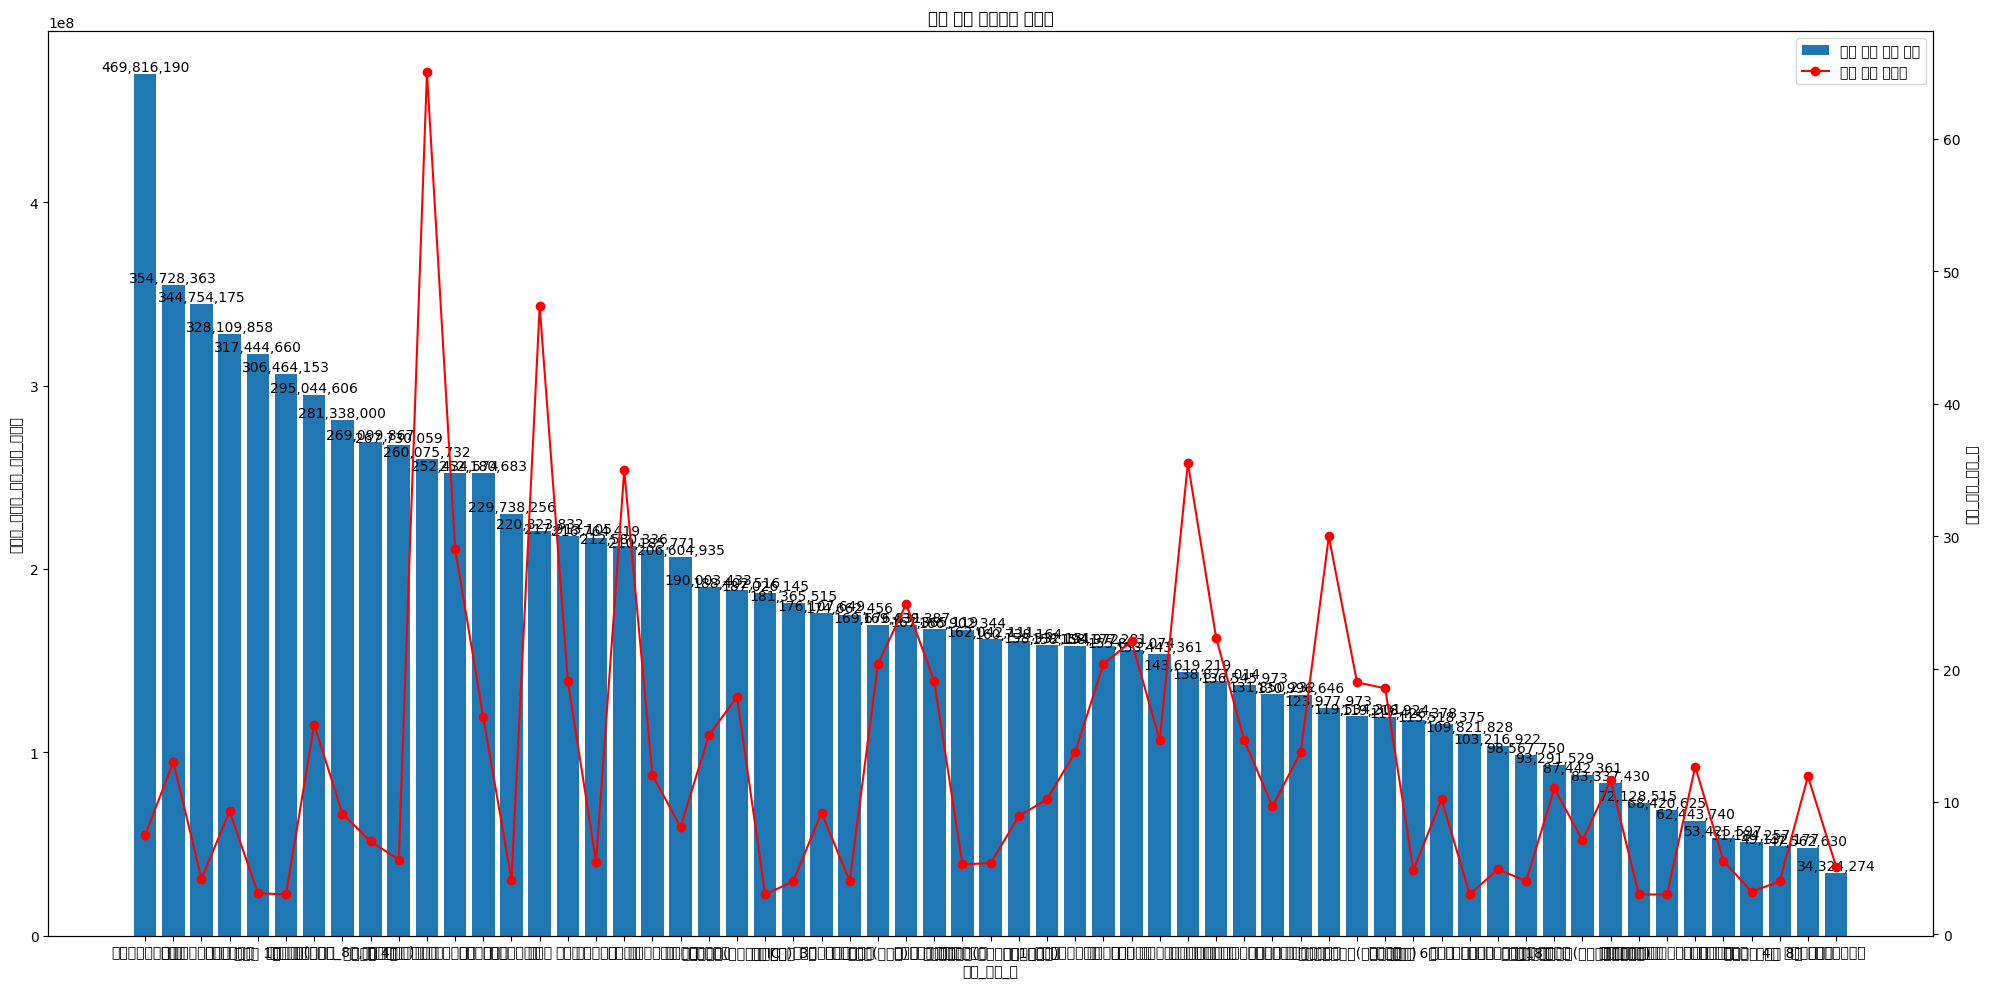

In [23]:
# 그래프 시각화
fig, ax1 = plt.subplots(figsize=(20, 10))

# 막대 그래프 (매출 금액)
color = 'tab:blue'
ax1.set_xlabel('상권_코드_명')
ax1.set_ylabel('상권별_점포당_분기_평균_매출액')
ax1.bar(sum_by_market.index, sum_by_market['상권별_점포당_분기_평균_매출액'], color=color, label='분기 평균 매출 금액')
ax1.tick_params(axis='y')

# 선 그래프 (유동인구 수)
color = 'red'
ax2 = ax1.twinx()
ax2.set_ylabel('유사_업종_점포_수')
ax2.plot(avg_q_store.index, avg_q_store['유사_업종_점포_수'], color=color, marker='o', label='분기 평균 점포수')

# x 축 설정
ax2.set_xticks(range(len(sum_by_market.index)))
ax2.set_xticklabels(sum_by_market.index, rotation=45)

# 그래프 제목
plt.title('분기 평균 매출액과 점포수')

# 막대에 숫자 표시
for i, v in enumerate(sum_by_market['상권별_점포당_분기_평균_매출액']):
    ax1.text(i, v, '{:,.0f}'.format(v), ha='center', va='bottom', color='black')

# 범례 추가
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.tight_layout()
plt.show()


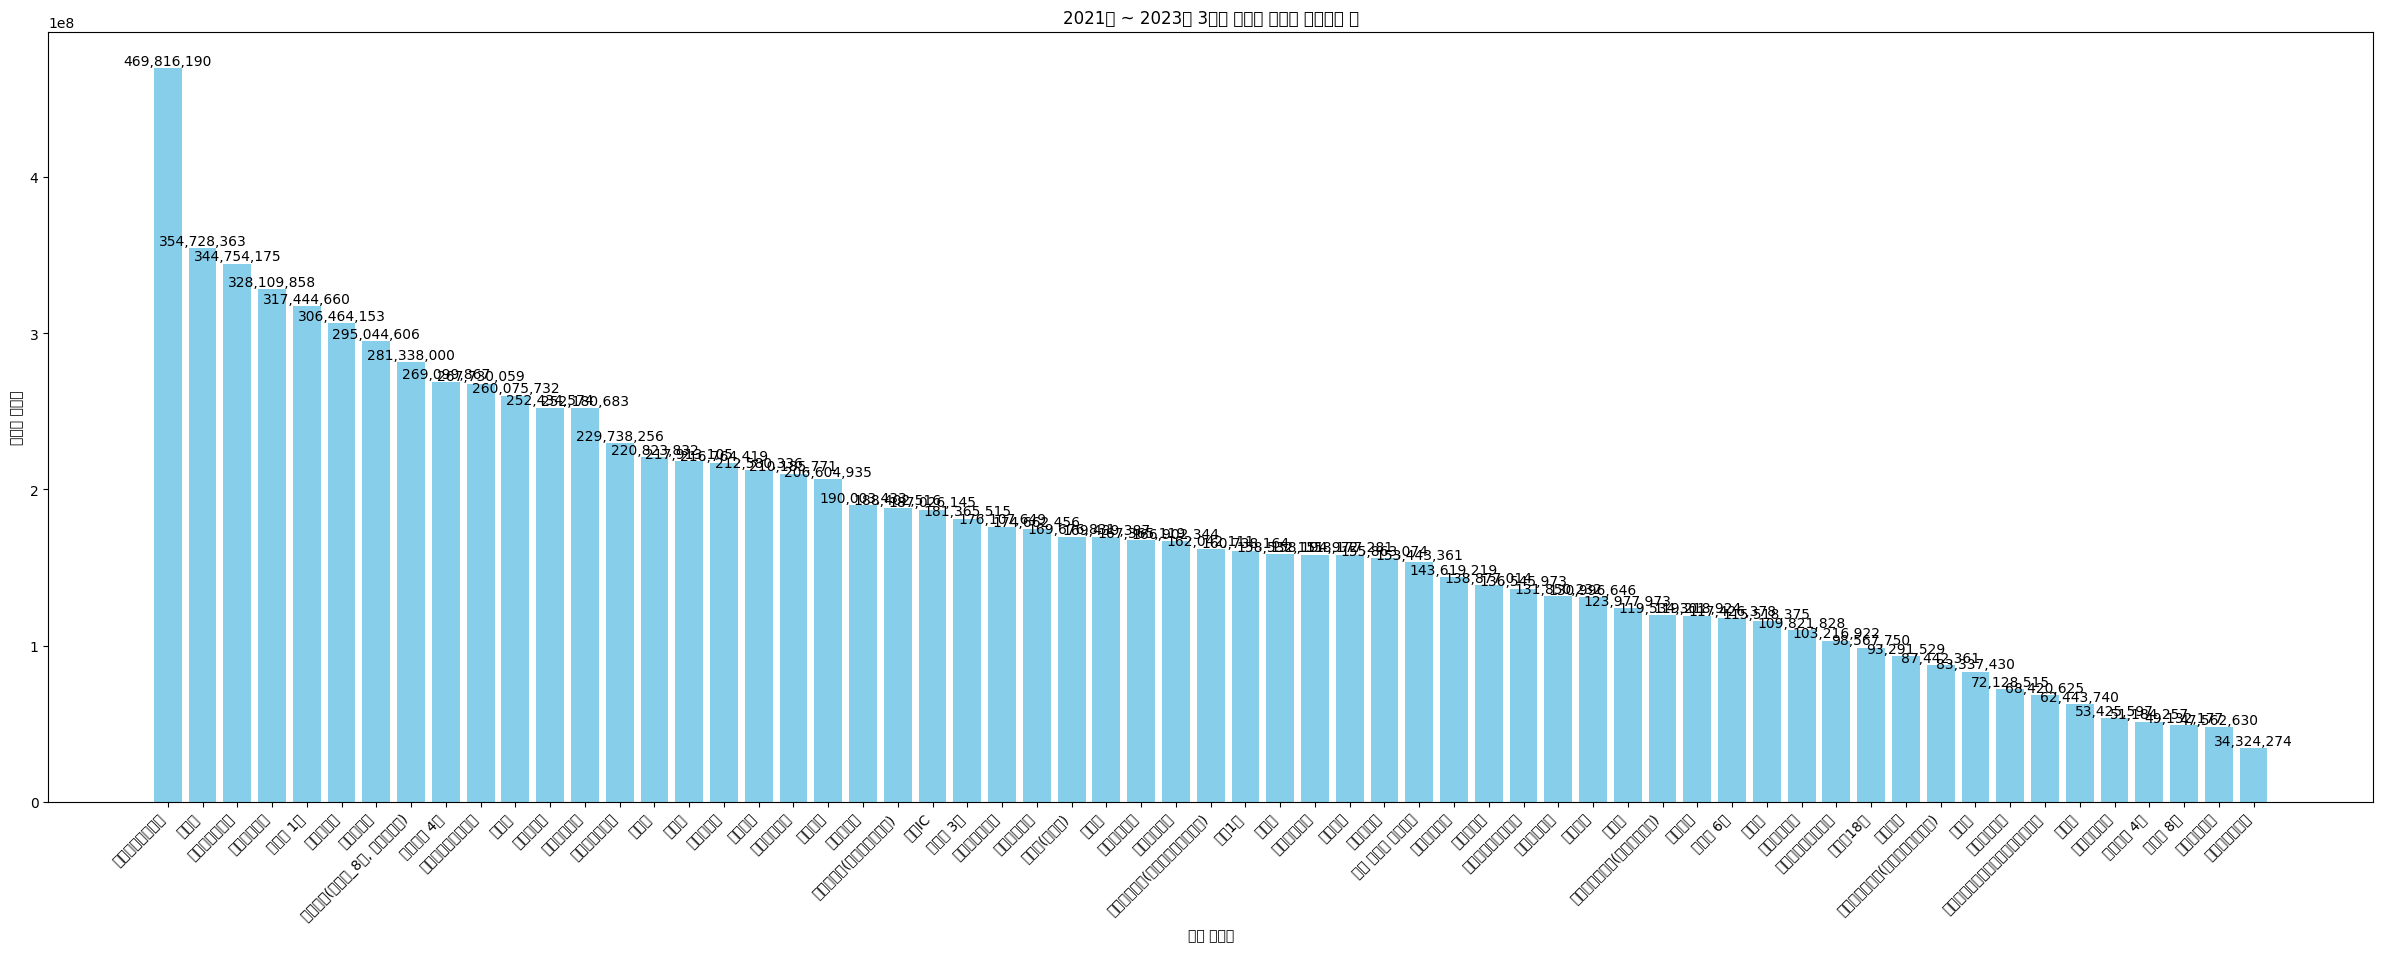

In [24]:
# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(30, 10))

# 막대 그래프 그리기
bars = plt.bar(sum_by_market.index, sum_by_market['상권별_점포당_분기_평균_매출액'], color='skyblue')

# x축 라벨 설정
plt.xlabel('상권 코드명')

# y축 라벨 설정
plt.ylabel('점포당 매출액')

# 그래프 제목 설정
plt.title('2021년 ~ 2023년 3분기 상권별 점포당 매출액의 합')

# x축 눈금 라벨 회전 및 정렬 설정
plt.xticks(rotation=45, ha='right')

# 각 막대에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,.0f}'.format(height),
             ha='center', va='bottom')

# 그래프 보여주기
plt.show()

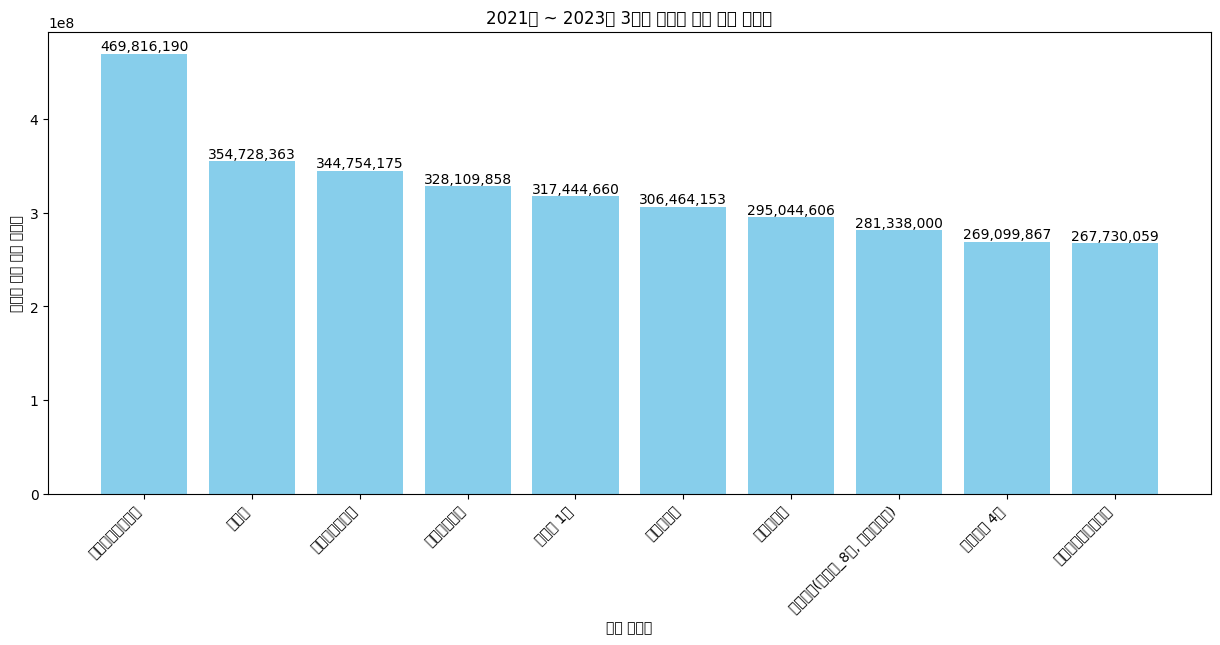

In [25]:
# 상위 10개만
# 새로운 figure 생성 및 크기 설정
plt.figure(figsize=(15, 6))

# 상위 10개만 선택
top_10_sum_by_market = sum_by_market.head(10)

# 막대 그래프 그리기
bars = plt.bar(top_10_sum_by_market.index, top_10_sum_by_market['상권별_점포당_분기_평균_매출액'], color='skyblue')

# x축 라벨 설정
plt.xlabel('상권 코드명')

# y축 라벨 설정
plt.ylabel('점포당 분기 평균 매출액')

# 그래프 제목 설정
plt.title('2021년 ~ 2023년 3분기 상권별 분기 평균 매출액')

# x축 눈금 라벨 회전 및 정렬 설정
plt.xticks(rotation=45, ha='right')

# 각 막대에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,.0f}'.format(height),
             ha='center', va='bottom')

# 그래프 보여주기
plt.show()

- 상권별로 매출액이 다름

#### 임의의 상권을 추출하여 시간대별 매출 확인

In [26]:
# 상권_코드_명이 주어진 조건에 해당하는 데이터 추출
data_venue_selected = data_venue.loc[data_venue['상권_코드_명'].isin(['선정릉역 4번', '영동대교남단교차로', '역삼역	', '뱅뱅사거리', '강남을지병원', '국악고교사거리', '선릉역', '서울세관'])]

# '선정릉역 4번', '윗방죽마을공원', '한남IC	', '언북초등학교', '성수대교남단', '휘문고교사거리', '대치동아우편취급국', '한티역'
# 상권_코드_명별로 그룹화하여 시간대별_점포당_매출액의 합 계산
grouped_data = data_venue_selected.groupby(['상권_코드_명', '시간대'])['시간대별_점포당_매출액'].mean().reset_index()

grouped_data

,상권_코드_명,시간대,시간대별_점포당_매출액
0,강남을지병원,00~06,2.448795e+07
1,강남을지병원,06~11,4.863239e+07
2,강남을지병원,11~14,4.562834e+07
3,강남을지병원,14~17,3.481532e+07
4,강남을지병원,17~21,5.775539e+07
5,강남을지병원,21~24,4.086129e+07
6,국악고교사거리,00~06,2.427092e+07
7,국악고교사거리,06~11,3.729939e+07
8,국악고교사거리,11~14,3.049500e+07
9,국악고교사거리,14~17,3.190243e+07


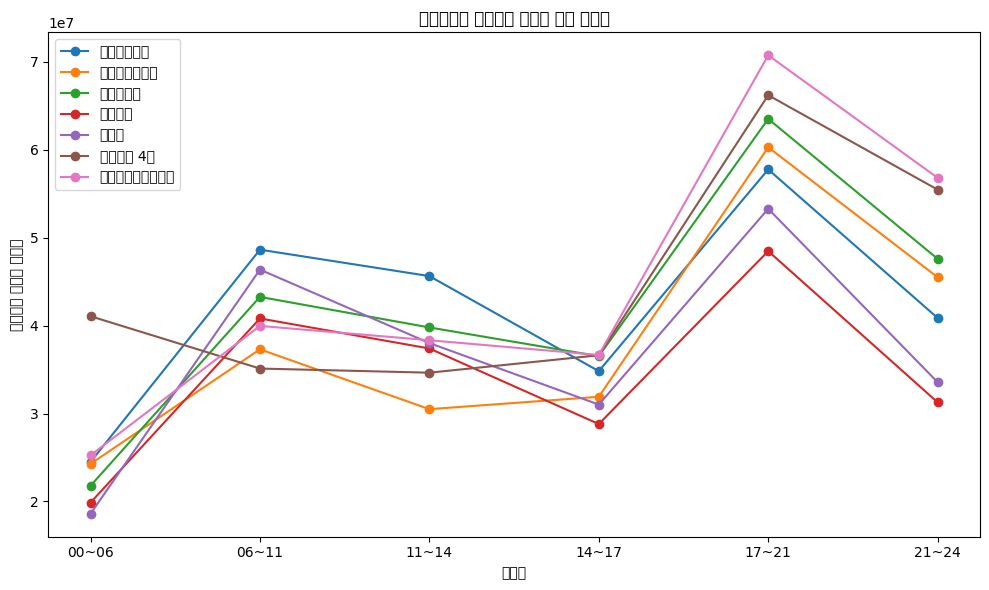

In [27]:
# 각 상권별로 선 그래프 그리기
plt.figure(figsize=(10, 6))
for market_code in grouped_data['상권_코드_명'].unique():
    data_market = grouped_data[grouped_data['상권_코드_명'] == market_code]
    plt.plot(data_market['시간대'], data_market['시간대별_점포당_매출액'], marker='o', label=market_code)

# 그래프 스타일 설정
plt.xlabel('시간대')
plt.ylabel('시간대별 점포당 매출액')
plt.title('상권에따른 시간대별 점포당 평균 매출액')
plt.legend(loc='upper left')
plt.xticks(rotation=0)

# 그래프 표시
plt.tight_layout()
plt.show()

- 임의의 상권을 추출했을 때, 시간대별 매출이 거의 비슷하긴 하나, 상권별로 조금씩 다른 매출 추이를 보임

# Machine Learning

### 새로운 피처 추가
- 선행 연구 자료 기반으로

#### 편의점 밀도
- 단위 면적당 평균적인 편의점의 수
- 편의시설 접근성과 밀집 정도를 파악
- 값이 높을수록 밀집 정도가 높음

In [28]:
data['편의점_밀도'] = data['유사_업종_점포_수']/data['영역_면적']
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적,시간대별_점포당_매출액,편의점_밀도
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,2.694046e+07,0.000073
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.589054e+07,0.000073
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.374695e+07,0.000073
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.644203e+07,0.000073
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,3.796411e+07,0.000073


#### 상주 인구 수 연령별 비중
- 데이터 취합해서 가져옴

#### 직장 인구 수 연령별 비중
- 데이터 취합해서 가져옴

## 데이터 확인

In [29]:
data.describe()

,기준_년,기준_분기,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적,시간대별_점포당_매출액,편의점_밀도
count,3930.000000,3930.000000,3.930000e+03,3.930000e+03,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3930.000000,3.930000e+03,3.930000e+03,3930.000000,3930.000000,3930.000000,3930.000000,3.930000e+03,3930.000000
mean,2021.920611,2.370992,4.121330e+08,2.178953e+05,10442.225954,0.004271,0.203760,0.291520,0.237881,0.162677,0.099891,2516.425954,0.105643,0.148357,0.206735,0.183897,0.150485,0.204882,1478.433588,46.358779,3.771142e+06,1.741865e+09,13.448855,0.293130,0.369466,178066.922137,2.990331e+07,0.000079
std,0.791150,1.069379,4.954507e+08,1.962799e+05,13675.530416,0.004125,0.058162,0.055971,0.037592,0.051871,0.059241,2081.661973,0.048897,0.048917,0.066975,0.033568,0.039649,0.055833,1306.951898,45.825002,7.071014e+05,1.382886e+09,11.458516,0.624908,0.754310,112426.372872,1.931967e+07,0.000039
min,2021.000000,1.000000,0.000000e+00,2.129000e+03,117.000000,0.000000,0.070896,0.160448,0.164179,0.044828,0.000000,15.000000,0.000000,0.000000,0.000000,0.111355,0.000000,0.102194,8.000000,0.000000,2.526010e+06,1.291135e+08,3.000000,0.000000,0.000000,17288.000000,0.000000e+00,0.000013
25%,2021.000000,1.000000,1.181678e+08,7.275925e+04,1542.000000,0.001757,0.171123,0.255838,0.212725,0.127944,0.056680,976.000000,0.070207,0.116162,0.164912,0.162216,0.128440,0.166778,556.000000,11.000000,3.258234e+06,7.982552e+08,5.000000,0.000000,0.000000,72437.000000,1.645599e+07,0.000054
50%,2022.000000,2.000000,2.591656e+08,1.521300e+05,6518.000000,0.002880,0.200701,0.298912,0.233866,0.153165,0.090439,1843.000000,0.092807,0.153497,0.211844,0.180103,0.146394,0.193750,940.000000,35.000000,3.572474e+06,1.239123e+09,10.000000,0.000000,0.000000,149660.000000,2.635304e+07,0.000069
75%,2023.000000,3.000000,5.327966e+08,3.268505e+05,12418.000000,0.005540,0.223909,0.327248,0.257796,0.188919,0.133318,3838.000000,0.132883,0.182955,0.257808,0.201835,0.166667,0.239100,2106.000000,75.000000,4.085253e+06,2.489688e+09,18.000000,0.000000,1.000000,256688.000000,3.919958e+07,0.000091
max,2023.000000,4.000000,4.043730e+09,1.142220e+06,61667.000000,0.020270,0.400000,0.426662,0.337657,0.309701,0.287313,8225.000000,0.315789,0.247740,0.339012,0.266968,0.310345,0.466667,5072.000000,215.000000,6.241887e+06,7.111261e+09,70.000000,5.000000,6.000000,562807.000000,1.581269e+08,0.000266


### 연속형과 범주형 변수 구분

In [30]:
import numpy as np

cat_cols = list(data.select_dtypes(exclude = np.number).columns)
num_cols = list(data.select_dtypes(include = np.number).columns)

print('cat_cols: ',cat_cols)
print('num_cols: ',num_cols)

cat_cols:  ['상권_구분_코드_명', '상권_코드_명', '행정동_코드_명', '시간대']
num_cols:  ['기준_년', '기준_분기', '시간대_매출금액', '시간대_유동인구_수', '총_직장_인구_수', '연령대_10_직장인구_비율', '연령대_20_직장인구_비율', '연령대_30_직장인구_비율', '연령대_40_직장인구_비율', '연령대_50_직장인구_비율', '연령대_60_이상_직장_인구_비율', '총_상주인구_수', '연령대_10_상주인구_비율', '연령대_20_상주인구_비율', '연령대_30_상주인구_비율', '연령대_40_상주인구_비율', '연령대_50_상주인구_비율', '연령대_60_이상_상주인구_비율', '총_가구_수', '집객시설_수', '월_평균_소득_금액', '지출_총금액', '유사_업종_점포_수', '개업_점포_수', '폐업_점포_수', '영역_면적', '시간대별_점포당_매출액', '편의점_밀도']


In [31]:
cat_cols = ['기준_년', '기준_분기', '시간대', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명']
num_cols = data.columns.difference(cat_cols).tolist()

In [32]:
print('cat_cols: ',cat_cols)
print('num_cols: ',num_cols)

cat_cols:  ['기준_년', '기준_분기', '시간대', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명']
num_cols:  ['개업_점포_수', '시간대_매출금액', '시간대_유동인구_수', '시간대별_점포당_매출액', '연령대_10_상주인구_비율', '연령대_10_직장인구_비율', '연령대_20_상주인구_비율', '연령대_20_직장인구_비율', '연령대_30_상주인구_비율', '연령대_30_직장인구_비율', '연령대_40_상주인구_비율', '연령대_40_직장인구_비율', '연령대_50_상주인구_비율', '연령대_50_직장인구_비율', '연령대_60_이상_상주인구_비율', '연령대_60_이상_직장_인구_비율', '영역_면적', '월_평균_소득_금액', '유사_업종_점포_수', '지출_총금액', '집객시설_수', '총_가구_수', '총_상주인구_수', '총_직장_인구_수', '편의점_밀도', '폐업_점포_수']


## 데이터 분포 확인

### 숫자형 변수 분포 확인

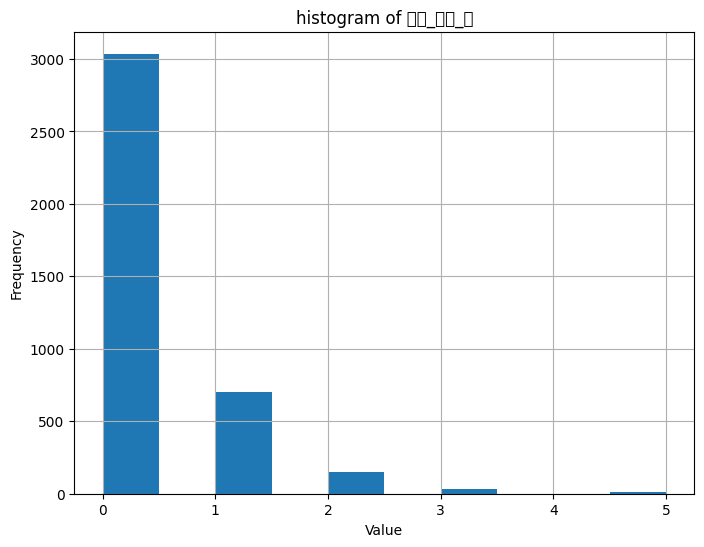

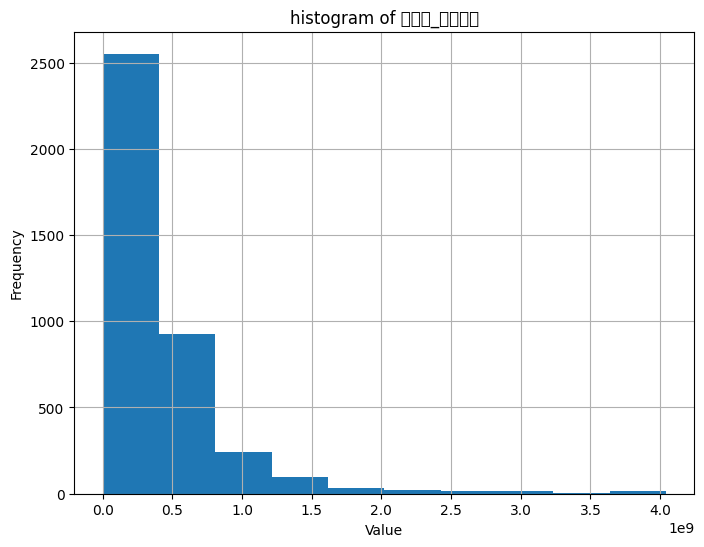

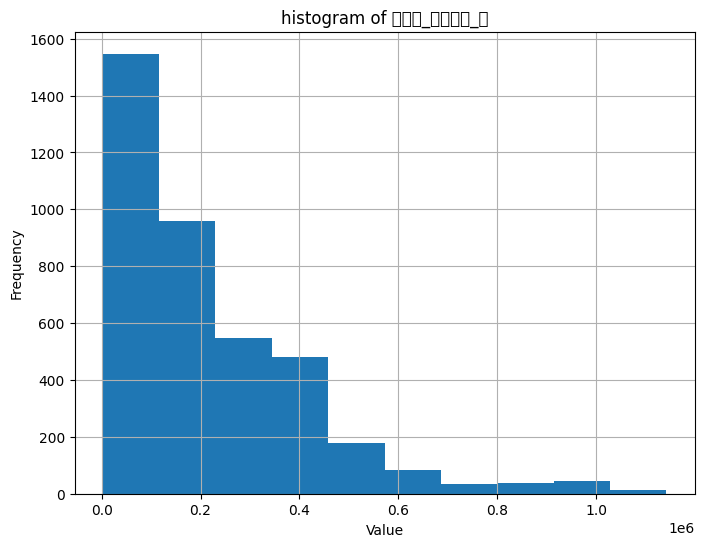

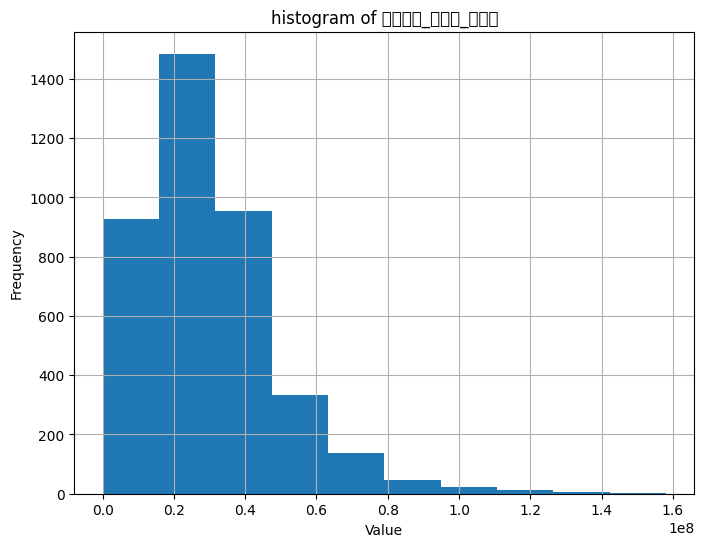

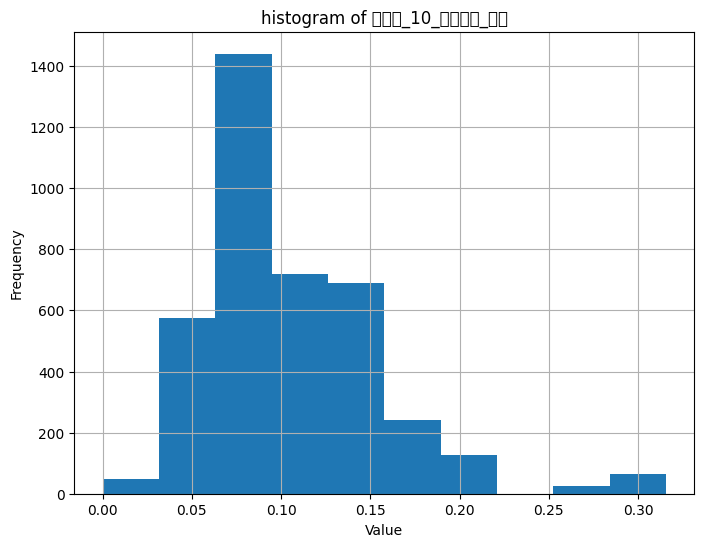

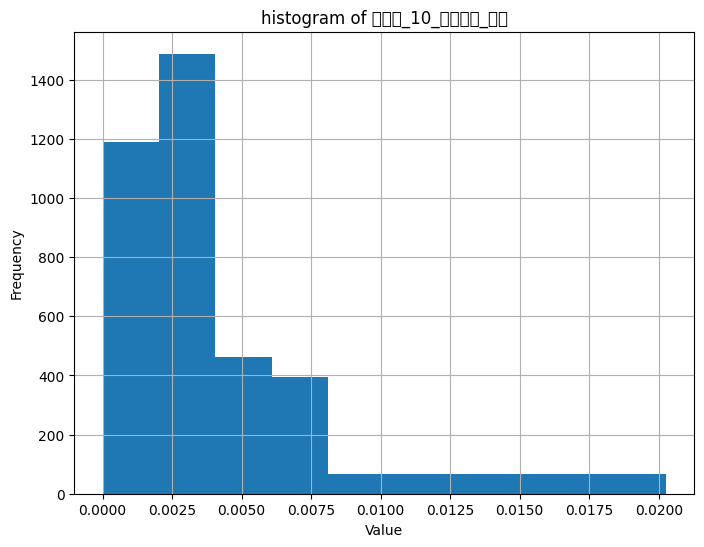

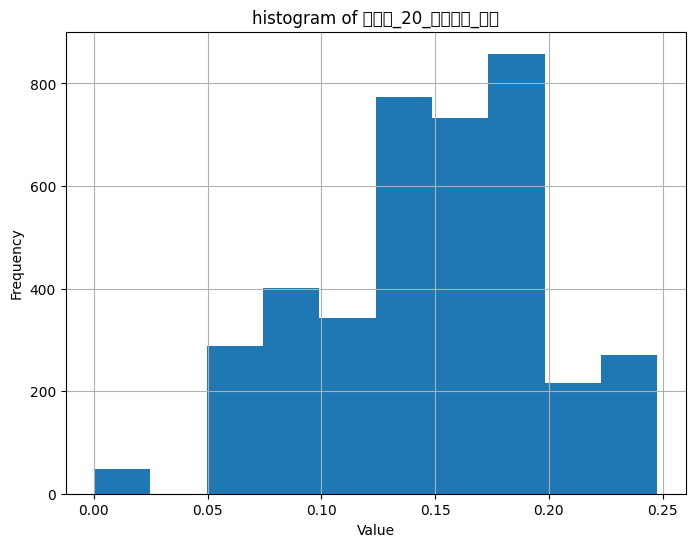

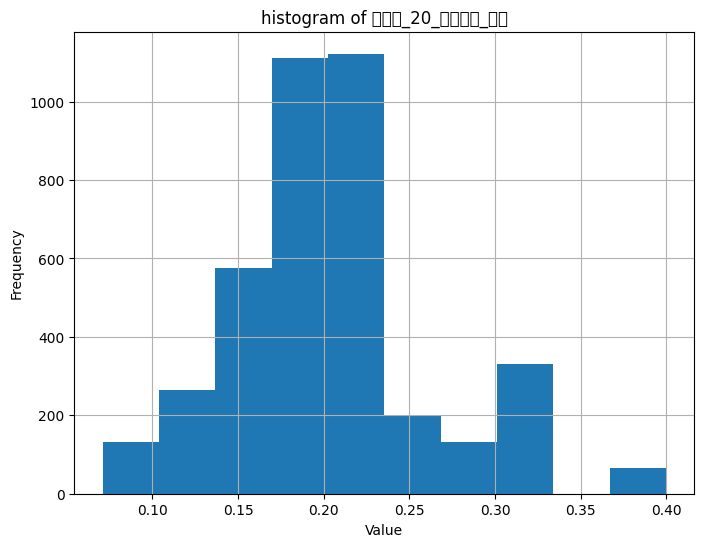

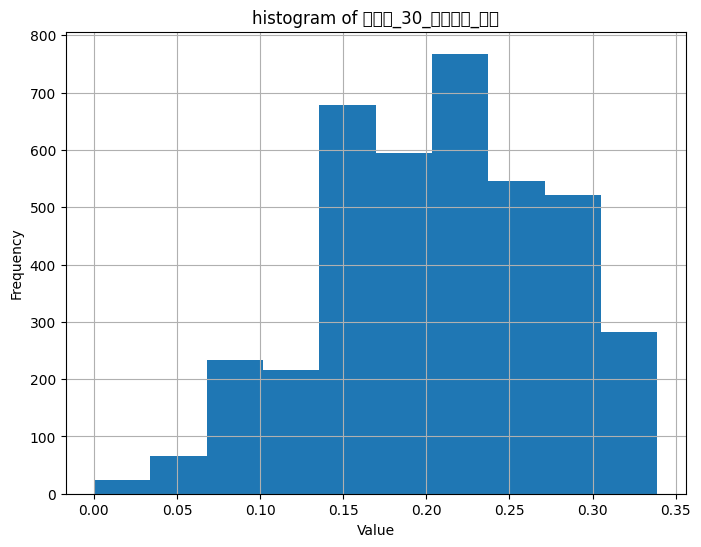

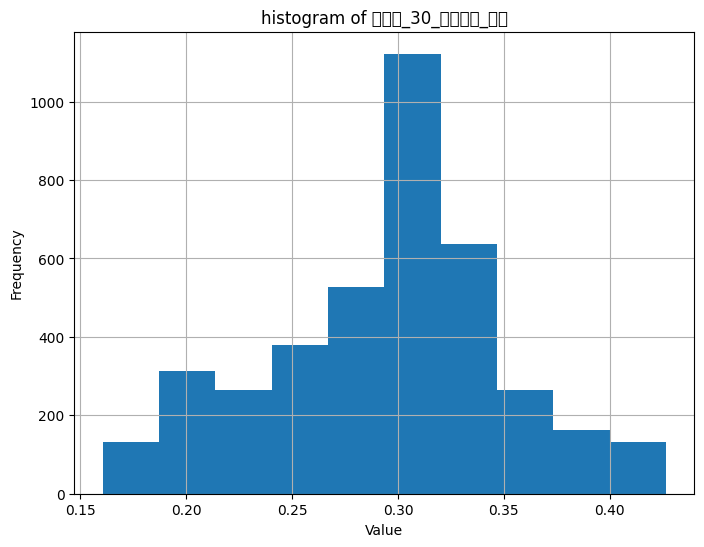

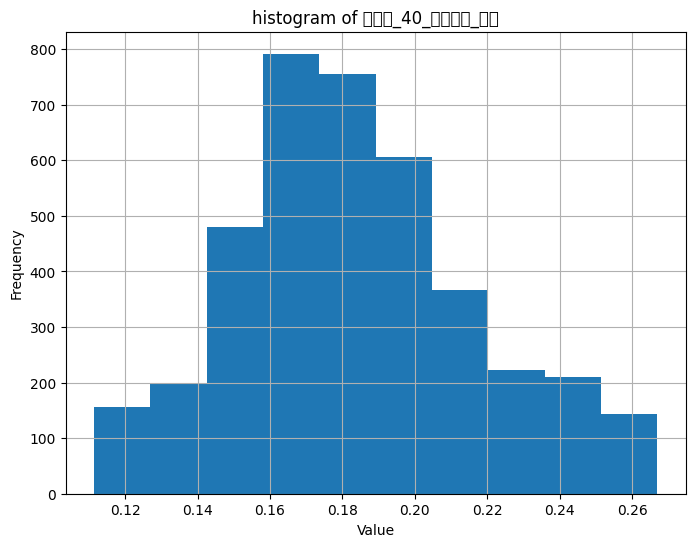

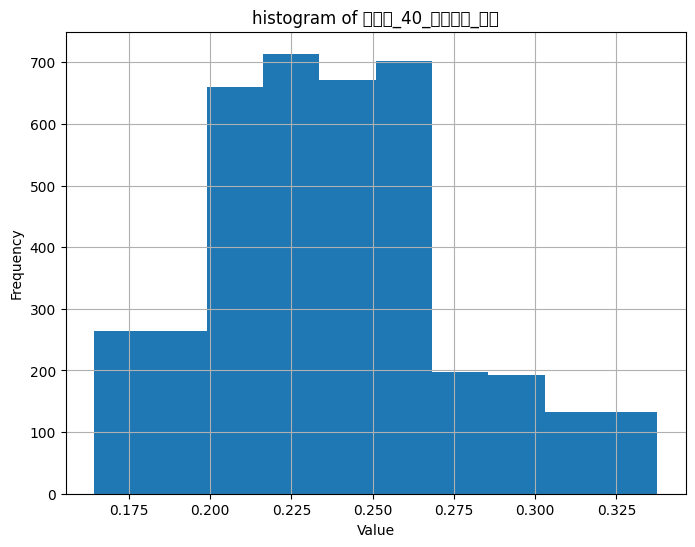

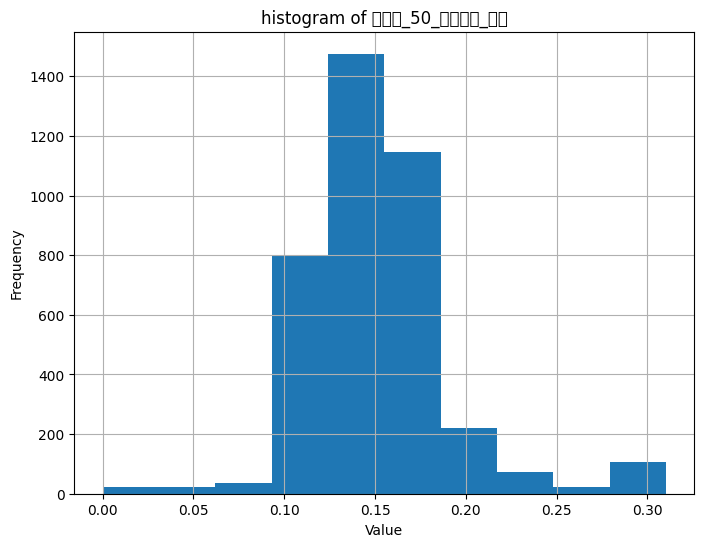

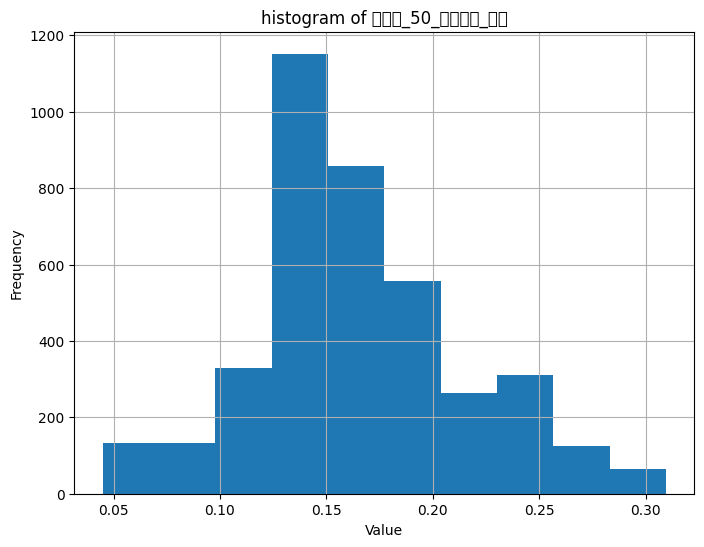

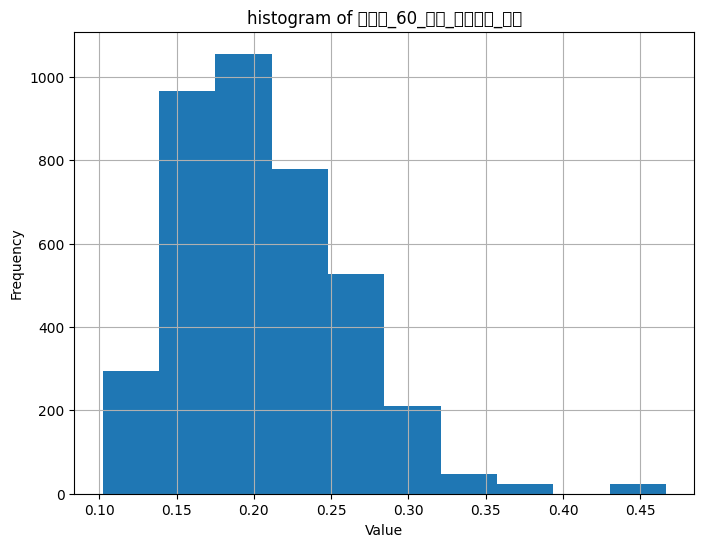

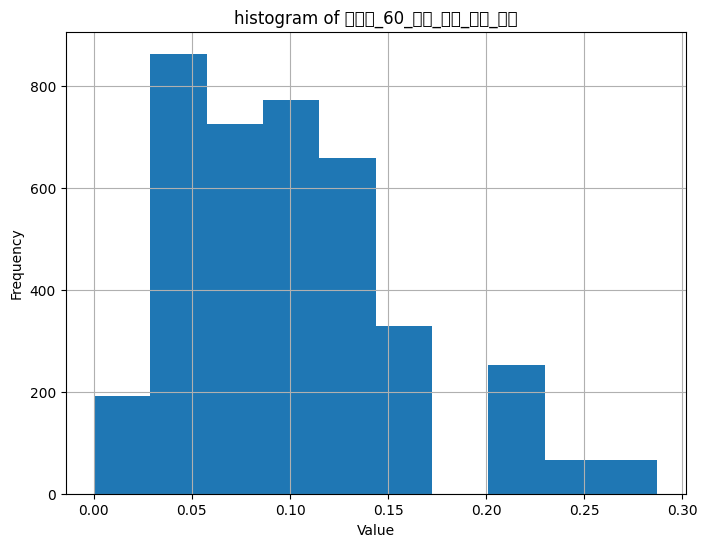

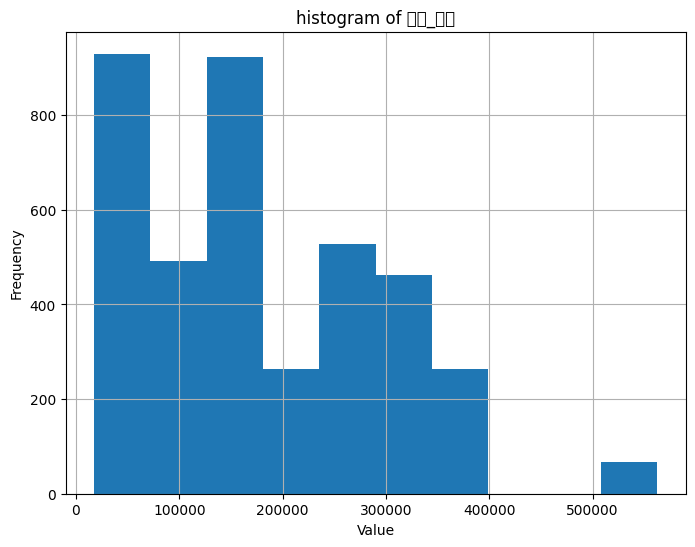

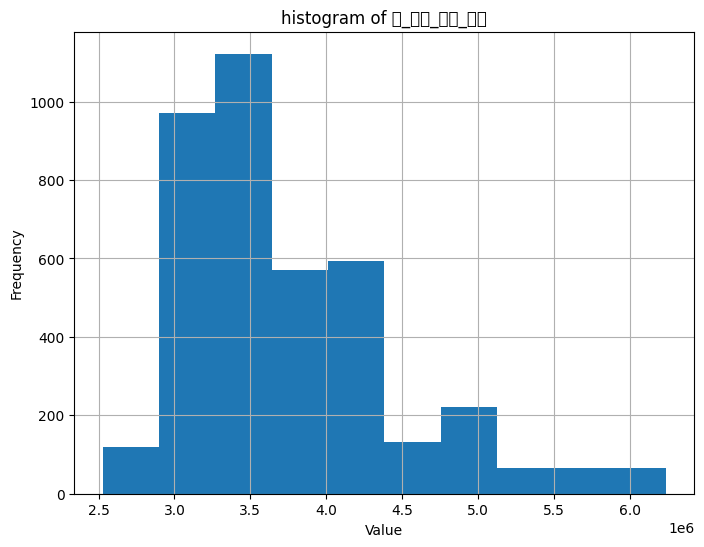

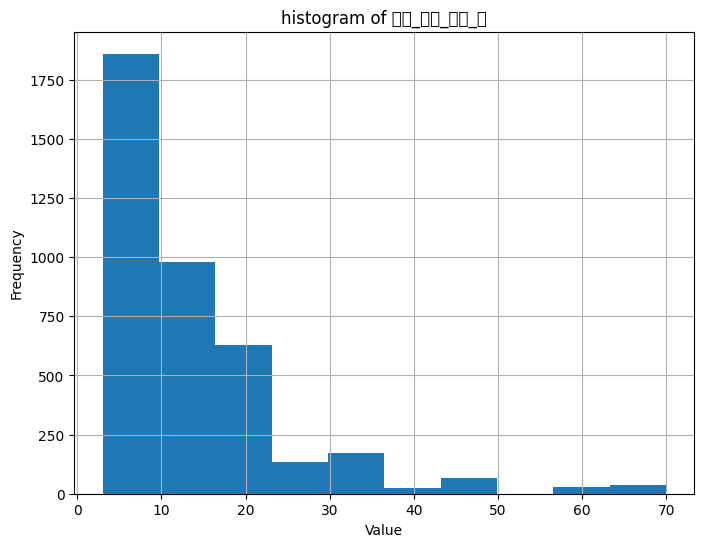

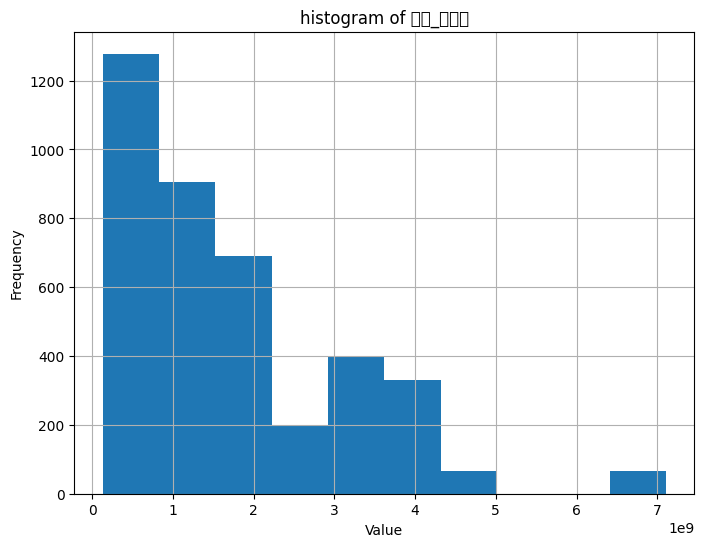

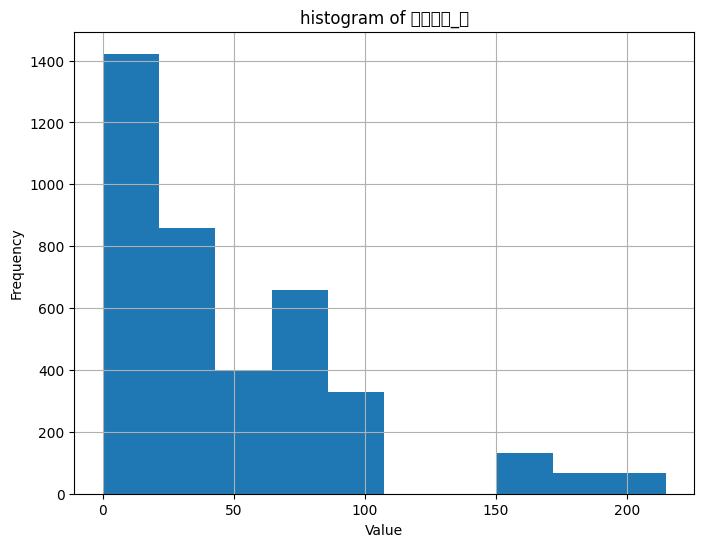

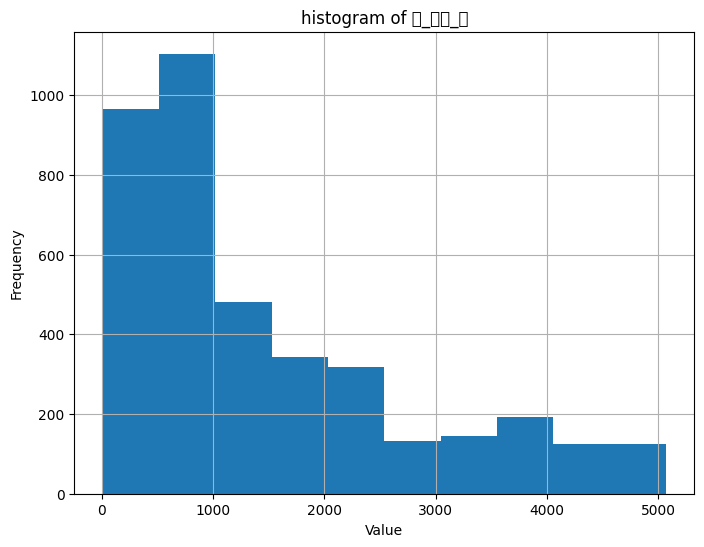

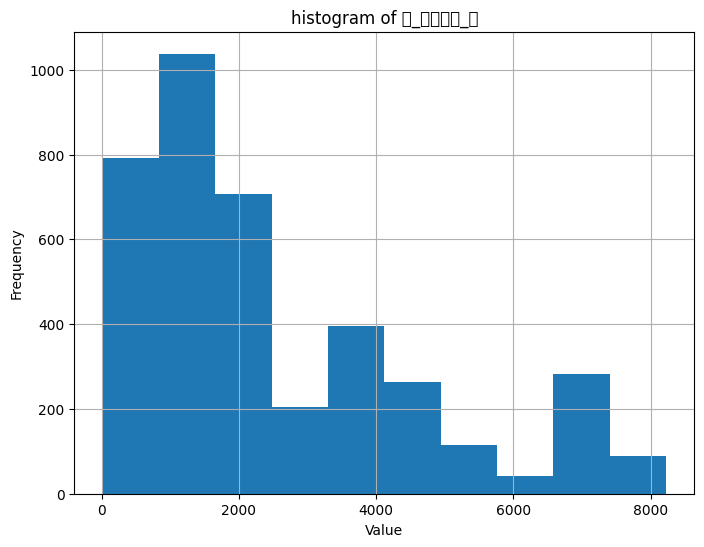

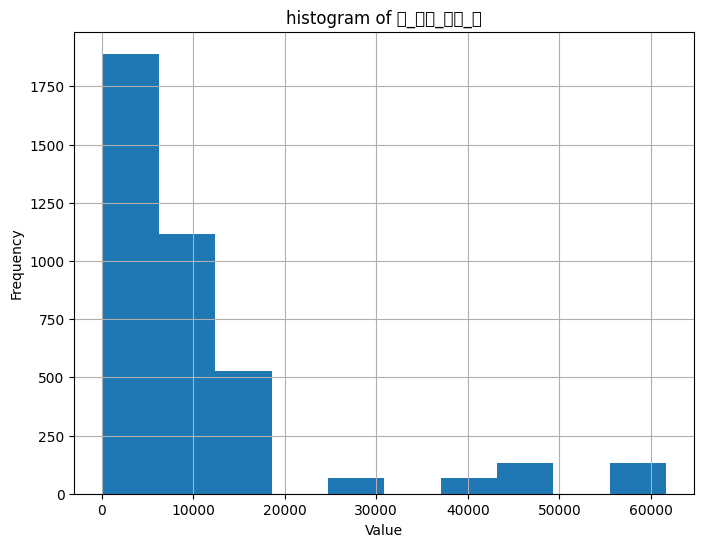

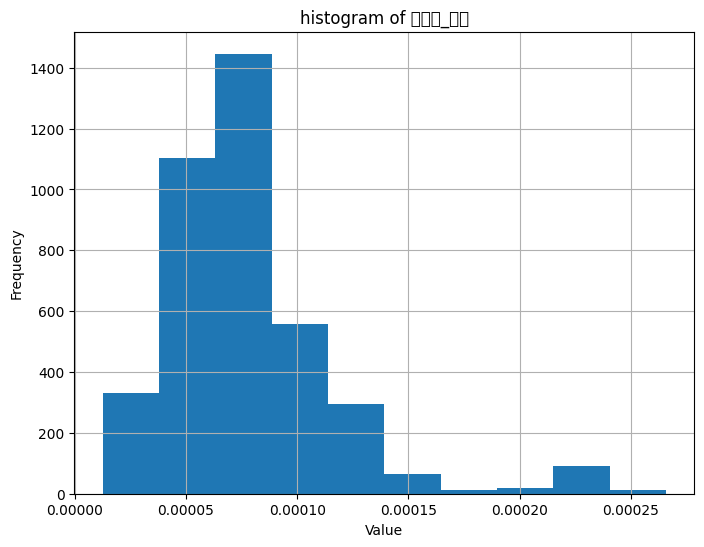

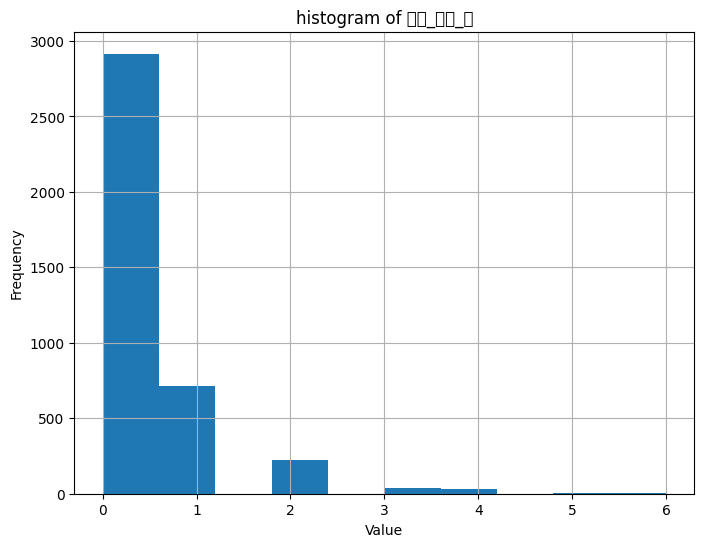

In [33]:
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

for column in num_cols:
    plt.figure(figsize=(8,6))
    data[column].hist(bins=10)
    plt.title(f'histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

### 범주형 변수 분포 확인

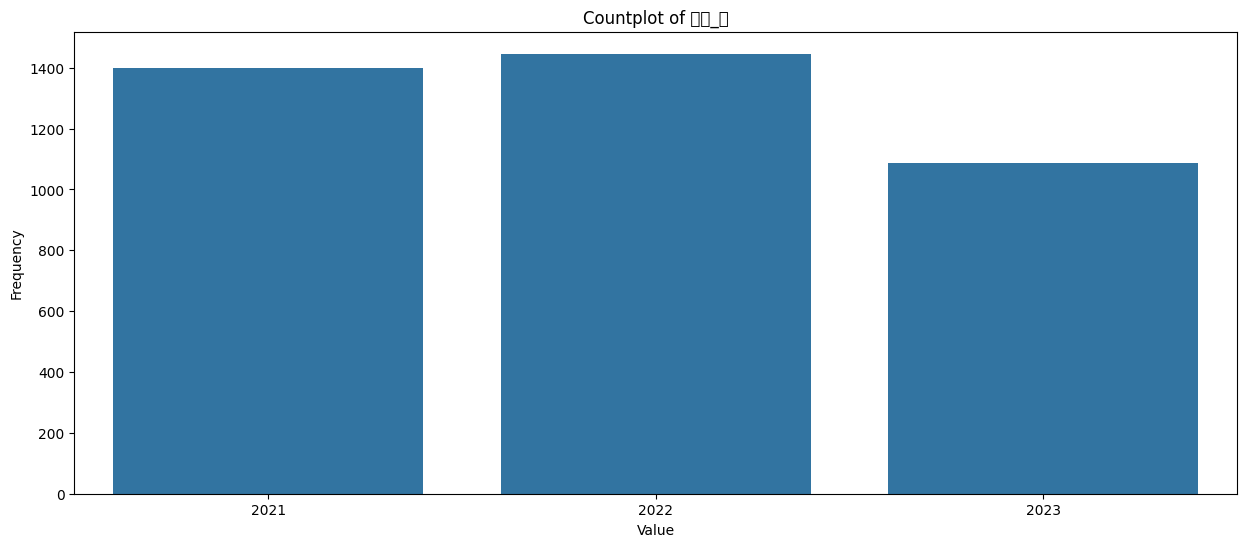

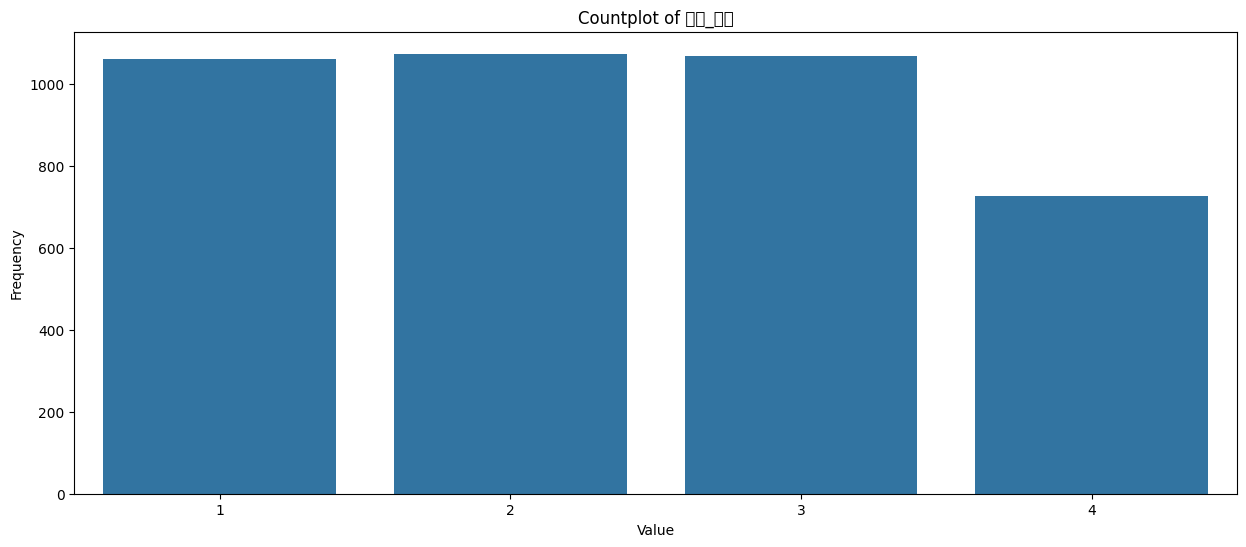

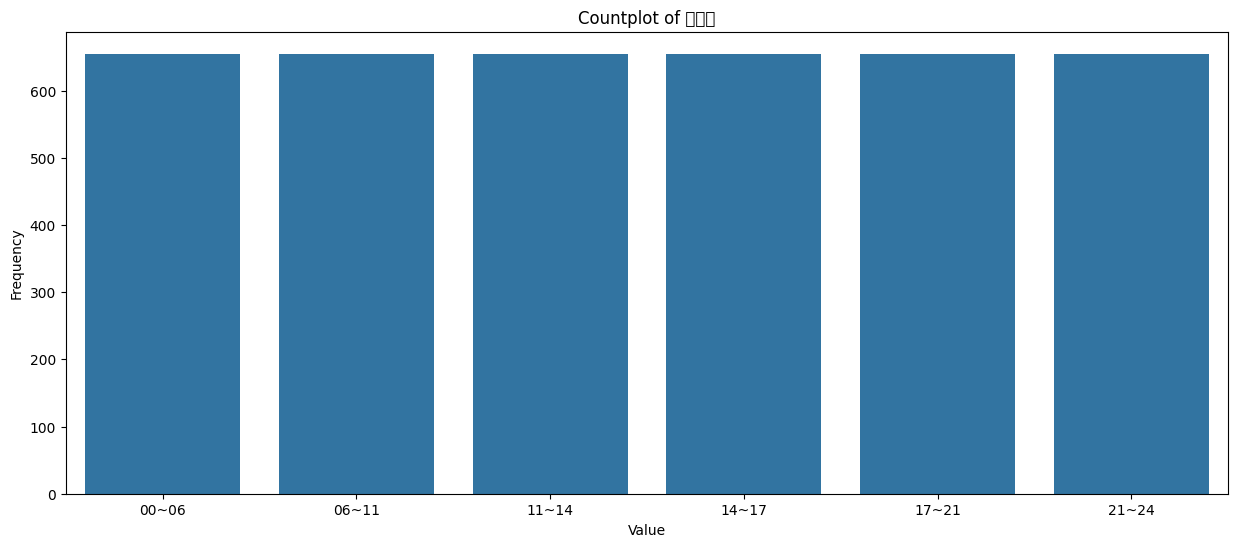

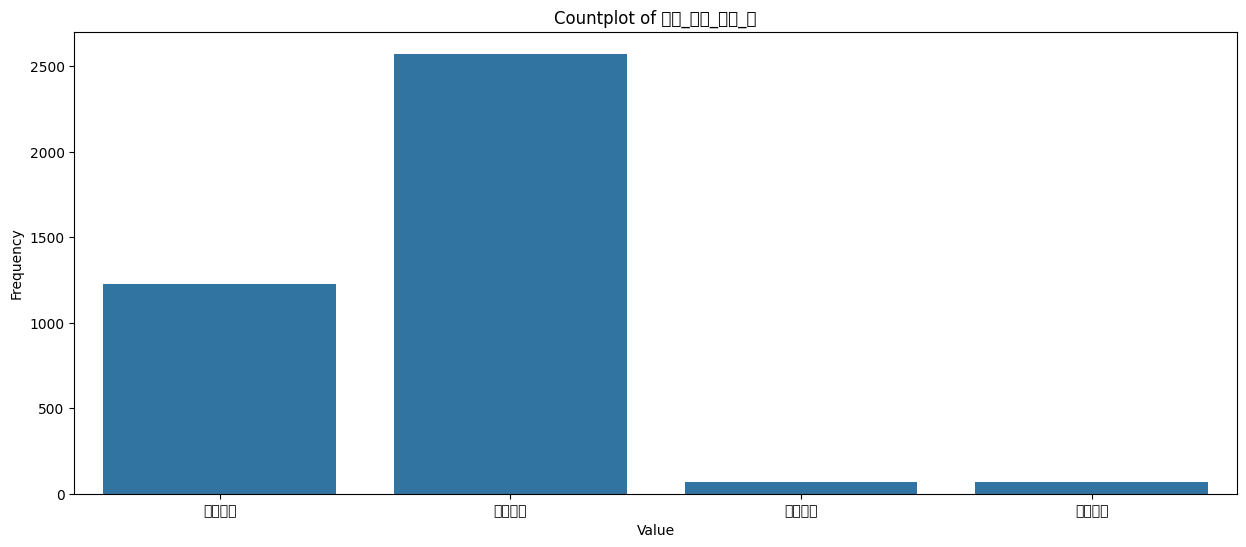

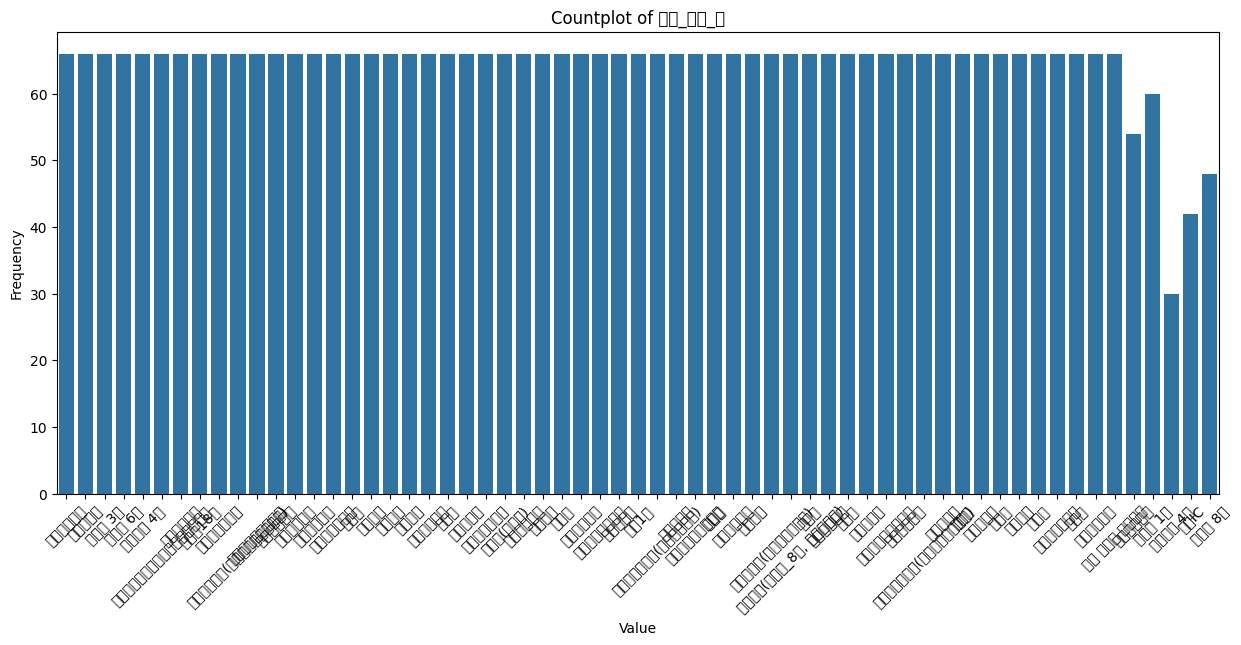

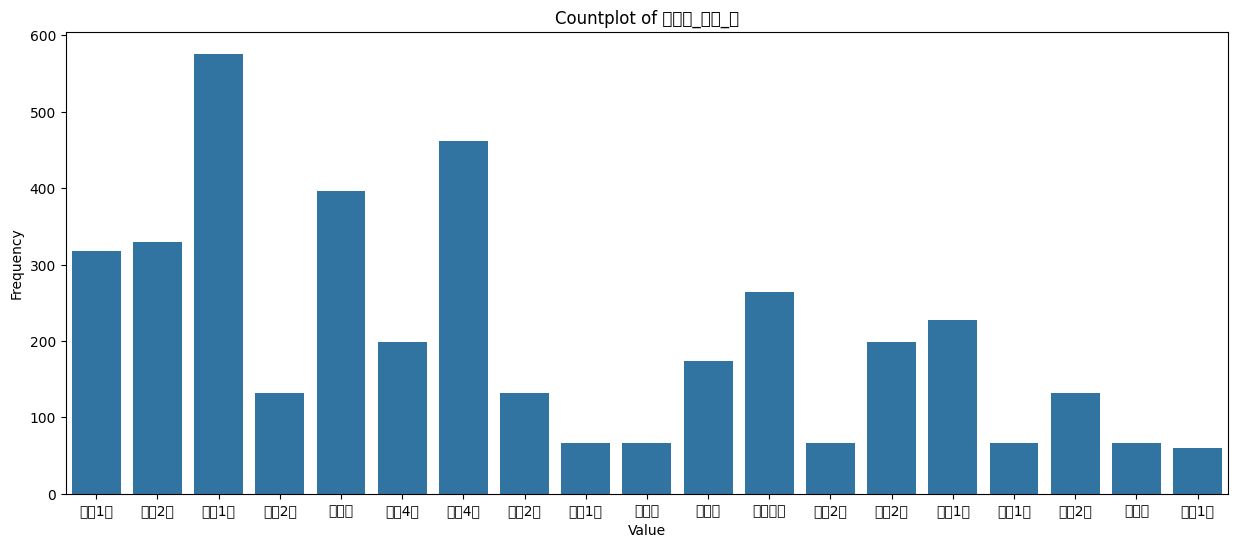

In [34]:
import seaborn as sns

for column in cat_cols:
    plt.figure(figsize=(15,6))
    sns.countplot(data=data, x=column)
    plt.title(f'Countplot of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    if column == '상권_코드_명':  # 상권_코드_명일 때만 rotation을 45도로 설정
        plt.xticks(rotation=45)
    else:
        plt.xticks(rotation=0)
    plt.show()

## 상관분석

### 시간대_매출금액과 관련 있는 변수만 추출

In [35]:
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적,시간대별_점포당_매출액,편의점_밀도
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,2.694046e+07,0.000073
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.589054e+07,0.000073
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.374695e+07,0.000073
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.644203e+07,0.000073
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,3.796411e+07,0.000073


In [36]:
data_corr = data.copy()
data_corr = data_corr.drop(columns=['기준_년', '기준_분기', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명', '개업_점포_수', '폐업_점포_수', '영역_면적'])
data_corr.head()

,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,시간대별_점포당_매출액,편의점_밀도
0,00~06,377166450.0,738999.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,2.694046e+07,0.000073
1,06~11,222467605.0,621019.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,1.589054e+07,0.000073
2,11~14,192457360.0,351383.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,1.374695e+07,0.000073
3,14~17,230188421.0,342564.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,1.644203e+07,0.000073
4,17~21,531497598.0,433632.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,3.796411e+07,0.000073


### 범주형 변수 더미화

In [37]:
data_corr = pd.get_dummies(data_corr, columns=['시간대'])

In [38]:
data_corr.head()

,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,시간대별_점포당_매출액,편의점_밀도,시간대_00~06,시간대_06~11,시간대_11~14,시간대_14~17,시간대_17~21,시간대_21~24
0,377166450.0,738999.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,2.694046e+07,0.000073,1,0,0,0,0,0
1,222467605.0,621019.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,1.589054e+07,0.000073,0,1,0,0,0,0
2,192457360.0,351383.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,1.374695e+07,0.000073,0,0,1,0,0,0
3,230188421.0,342564.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,1.644203e+07,0.000073,0,0,0,1,0,0
4,531497598.0,433632.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,3.796411e+07,0.000073,0,0,0,0,1,0


In [39]:
### 더미 변수화된 값이 불리언 형태로 나왔다면 0과 1로 변환
data_corr.replace({True: 1, False: 0}, inplace=True)

### 숫자형 변수 정규화

In [40]:
print('cat_cols: ',cat_cols)
print('num_cols: ',num_cols)

cat_cols:  ['기준_년', '기준_분기', '시간대', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명']
num_cols:  ['개업_점포_수', '시간대_매출금액', '시간대_유동인구_수', '시간대별_점포당_매출액', '연령대_10_상주인구_비율', '연령대_10_직장인구_비율', '연령대_20_상주인구_비율', '연령대_20_직장인구_비율', '연령대_30_상주인구_비율', '연령대_30_직장인구_비율', '연령대_40_상주인구_비율', '연령대_40_직장인구_비율', '연령대_50_상주인구_비율', '연령대_50_직장인구_비율', '연령대_60_이상_상주인구_비율', '연령대_60_이상_직장_인구_비율', '영역_면적', '월_평균_소득_금액', '유사_업종_점포_수', '지출_총금액', '집객시설_수', '총_가구_수', '총_상주인구_수', '총_직장_인구_수', '편의점_밀도', '폐업_점포_수']


In [41]:
num_cols_scaler = ['시간대_매출금액', '시간대_유동인구_수', '시간대별_점포당_매출액', '연령대_10_상주인구_비율', '연령대_10_직장인구_비율', '연령대_20_상주인구_비율', '연령대_20_직장인구_비율', '연령대_30_상주인구_비율', '연령대_30_직장인구_비율', '연령대_40_상주인구_비율', '연령대_40_직장인구_비율', '연령대_50_상주인구_비율', '연령대_50_직장인구_비율', '연령대_60_이상_상주인구_비율', '연령대_60_이상_직장_인구_비율', '월_평균_소득_금액', '유사_업종_점포_수', '지출_총금액', '집객시설_수', '총_가구_수', '총_상주인구_수', '총_직장_인구_수', '편의점_밀도']

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_corr[num_cols_scaler] = scaler.fit_transform(data_corr[num_cols_scaler])

data_corr.head()

,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,시간대별_점포당_매출액,편의점_밀도,시간대_00~06,시간대_06~11,시간대_11~14,시간대_14~17,시간대_17~21,시간대_21~24
0,-0.070584,2.655238,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.153379,-0.143566,1,0,0,0,0,0
1,-0.382863,2.054081,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.725404,-0.143566,0,1,0,0,0,0
2,-0.443442,0.680175,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.836371,-0.143566,0,0,1,0,0,0
3,-0.367277,0.635238,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.696855,-0.143566,0,0,0,1,0,0
4,0.240952,1.099267,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,0.417286,-0.143566,0,0,0,0,1,0


### 상관분석

In [43]:
correlation_matrix = data_corr.corr()

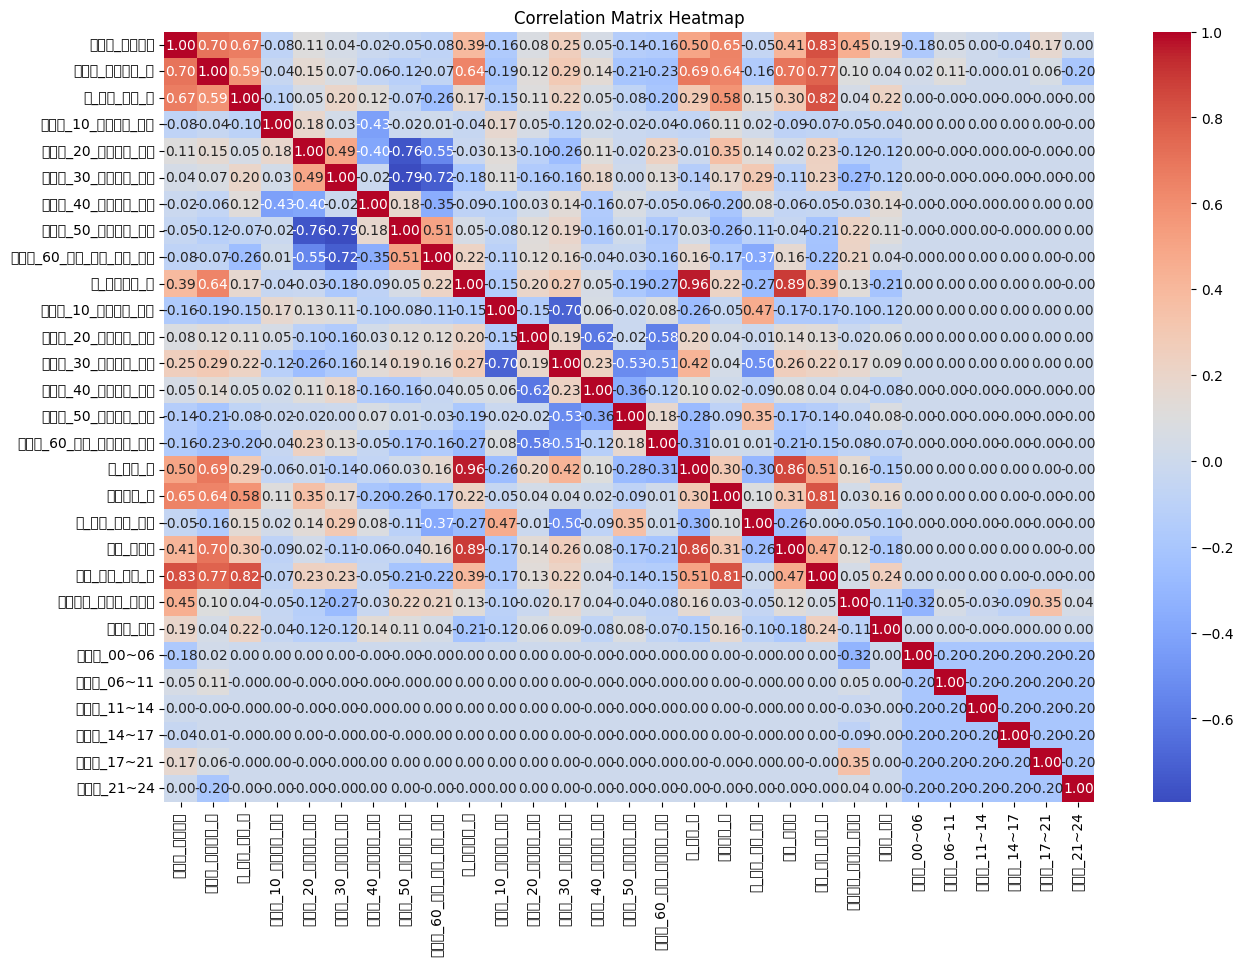

In [44]:
# heatmap 시각화
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

- 월평균 소득 금액과 시간대는 편의점 매출과 큰 연관이 없는 것으로 보임

In [45]:
list(data_corr.columns)

['시간대_매출금액',
 '시간대_유동인구_수',
 '총_직장_인구_수',
 '연령대_10_직장인구_비율',
 '연령대_20_직장인구_비율',
 '연령대_30_직장인구_비율',
 '연령대_40_직장인구_비율',
 '연령대_50_직장인구_비율',
 '연령대_60_이상_직장_인구_비율',
 '총_상주인구_수',
 '연령대_10_상주인구_비율',
 '연령대_20_상주인구_비율',
 '연령대_30_상주인구_비율',
 '연령대_40_상주인구_비율',
 '연령대_50_상주인구_비율',
 '연령대_60_이상_상주인구_비율',
 '총_가구_수',
 '집객시설_수',
 '월_평균_소득_금액',
 '지출_총금액',
 '유사_업종_점포_수',
 '시간대별_점포당_매출액',
 '편의점_밀도',
 '시간대_00~06',
 '시간대_06~11',
 '시간대_11~14',
 '시간대_14~17',
 '시간대_17~21',
 '시간대_21~24']

# 회귀분석 및 모델링

## 회귀분석 - 독립변수 전체

In [46]:
import statsmodels.formula.api as smf

# 컬럼명에서 '~'를 '_'로 대체
data_corr.columns = data_corr.columns.str.replace('~', '_')

# 모든 독립 변수를 하나의 문자열로 묶음
formula = "시간대_매출금액 ~ 시간대_유동인구_수 + 총_직장_인구_수 + 연령대_10_직장인구_비율 + 연령대_20_직장인구_비율 + 연령대_30_직장인구_비율 + 연령대_40_직장인구_비율 + 연령대_50_직장인구_비율 + 연령대_60_이상_직장_인구_비율 + 총_상주인구_수 + 연령대_10_상주인구_비율 + 연령대_20_상주인구_비율 + 연령대_30_상주인구_비율 + 연령대_40_상주인구_비율 + 연령대_50_상주인구_비율 + 연령대_60_이상_상주인구_비율 + 총_가구_수 + 집객시설_수 + 월_평균_소득_금액 + 지출_총금액 + 유사_업종_점포_수 + 시간대별_점포당_매출액 + 편의점_밀도 + 시간대_00_06 + 시간대_06_11 + 시간대_11_14 + 시간대_14_17 + 시간대_17_21 + 시간대_21_24"

# 모델 정의
model_revenue = smf.ols(formula, data=data_corr).fit()

# 모델 요약
model_revenue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               시간대_매출금액   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1211.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:30:24   Log-Likelihood:                -1313.2
No. Observations:                3930   AIC:                             2678.
Df Residuals:                    3904   BIC:                             2842.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.148e-16      0.005  -4.63e-14      1.000      -0.009       0.009
시간대_유동인구_수             0.2265      0.013     17.617      0.000       0.201       0.252
총_직장_인구_수             -0.0594      0.012     -4.772      0.000      -0.084      -0.035
연령대_10_직장인구_비율         0.0168      0.007      2.515      0.012       0.004       0.030
연령대_20_직장인구_비율        -0.0009      0.007     -0.137      0.891      -0.014       0.012
연령대_30_직장인구_비율        -0.0331      0.008     -4.241      0.000      -0.048      -0.018
연령대_40_직장인구_비율         0.0346      0.008      4.580      0.000       0.020       0.049
연령대_50_직장인구_비율        -0.0231      0.009     -2.715      0.007      -0.040      -0.006
연령대_60_이상_직장_인구_비율     0.0292      0.008      3.845      0.000       0.014       0.044
총_상주인구_수              -0.1117      0.032     -3.464      0.001      -0.175      -0.048
연령대_10_상주인구_비율         0.0845      0.008     10.605      0.000       0.069       0.100
연령대_20_상주인구_비율        -0.0857      0.010     -8.809      0.000      -0.105      -0.067
연령대_30_상주인구_비율         0.0334      0.010      3.434      0.001       0.014       0.052
연령대_40_상주인구_비율        -0.0750      0.010     -7.424      0.000      -0.095      -0.055
연령대_50_상주인구_비율         0.0257      0.007      3.929      0.000       0.013       0.039
연령대_60_이상_상주인구_비율     -0.0122      0.006     -1.893      0.058      -0.025       0.000
총_가구_수                 0.2013      0.031      6.513      0.000       0.141       0.262
집객시설_수                -0.1199      0.013     -9.481      0.000      -0.145      -0.095
월_평균_소득_금액            -0.0154      0.009     -1.762      0.078      -0.032       0.002
지출_총금액                -0.1817      0.014    -12.789      0.000      -0.210      -0.154
유사_업종_점포_수             0.8426      0.021     39.400      0.000       0.801       0.885
시간대별_점포당_매출액           0.3696      0.007     54.433      0.000       0.356       0.383
편의점_밀도                 0.0203      0.007      2.926      0.003       0.007       0.034
시간대_00_06             -0.1434      0.013    -10.966      0.000      -0.169      -0.118
시간대_06_11              0.0136      0.013      1.081      0.280      -0.011       0.038
시간대_11_14              0.0244      0.012      2.015      0.044       0.001       0.048
시간대_14_17             -0.0252      0.012     -2.063      0.039      -0.049      -0.001
시간대_17_21              0.0609      0.013      4.587      0.000       0.035       0.087
시간대_21_24              0.0696      0.013      5.182      0.000       0.043       0.096
==============================================================================
Omnibus:                     1085.844   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22308.054
Skew:                           0.806   Prob(JB):             

### 다중공선성 확인

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 다중공선성을 계산할 독립 변수들을 선택
X = data_corr[['시간대_유동인구_수',
 '총_직장_인구_수',
 '연령대_10_직장인구_비율',
 '연령대_20_직장인구_비율',
 '연령대_30_직장인구_비율',
 '연령대_40_직장인구_비율',
 '연령대_50_직장인구_비율',
 '연령대_60_이상_직장_인구_비율',
 '총_상주인구_수',
 '연령대_10_상주인구_비율',
 '연령대_20_상주인구_비율',
 '연령대_30_상주인구_비율',
 '연령대_40_상주인구_비율',
 '연령대_50_상주인구_비율',
 '연령대_60_이상_상주인구_비율',
 '총_가구_수',
 '집객시설_수',
 '월_평균_소득_금액',
 '지출_총금액',
 '유사_업종_점포_수',
 '시간대별_점포당_매출액',
 '편의점_밀도',
 '시간대_00_06',
 '시간대_06_11',
 '시간대_11_14',
 '시간대_14_17',
 '시간대_17_21',
 '시간대_21_24']]

# VIF 계산
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,5.651593,시간대_유동인구_수
1,5.297670,총_직장_인구_수
2,inf,연령대_10_직장인구_비율
3,inf,연령대_20_직장인구_비율
4,inf,연령대_30_직장인구_비율
5,inf,연령대_40_직장인구_비율
6,inf,연령대_50_직장인구_비율
7,inf,연령대_60_이상_직장_인구_비율
8,35.515838,총_상주인구_수
9,inf,연령대_10_상주인구_비율


In [48]:
model_revenue = smf.ols("시간대_매출금액 ~ 시간대_유동인구_수 + 총_상주인구_수 + 총_가구_수 + 집객시설_수 + 월_평균_소득_금액 + 지출_총금액",
                        data = data_corr).fit()
model_revenue.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               시간대_매출금액   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1065.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:30:25   Log-Likelihood:                -3677.7
No. Observations:                3930   AIC:                             7369.
Df Residuals:                    3923   BIC:                             7413.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.012e-19      0.010  -9.15e-17      1.000      -0.019       0.019
시간대_유동인구_수     0.4265      0.018     23.068      0.000       0.390       0.463
총_상주인구_수      -0.6957      0.044    -15.981      0.000      -0.781      -0.610
총_가구_수         0.8987      0.039     22.881      0.000       0.822       0.976
집객시설_수         0.2977      0.014     21.380      0.000       0.270       0.325
월_평균_소득_금액     0.0355      0.011      3.313      0.001       0.014       0.056
지출_총금액        -0.1214      0.024     -5.053      0.000      -0.169      -0.074
==============================================================================
Omnibus:                     1573.437   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14062.518
Skew:                           1.662   Prob(JB):                         0.00
Kurtosis:                      11.651   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 모델링

In [49]:
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,영역_면적,시간대별_점포당_매출액,편의점_밀도
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,2.694046e+07,0.000073
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.589054e+07,0.000073
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.374695e+07,0.000073
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,1.644203e+07,0.000073
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,190913.0,3.796411e+07,0.000073


#### 불필요한 영역_면적 컬럼 drop

In [50]:
data = data.drop(columns=['영역_면적'])
data.head()

,기준_년,기준_분기,상권_구분_코드_명,상권_코드_명,행정동_코드_명,시간대,시간대_매출금액,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,시간대별_점포당_매출액,편의점_밀도
0,2021,1,골목상권,논현초등학교,논현1동,00~06,377166450.0,738999.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,2.694046e+07,0.000073
1,2021,1,골목상권,논현초등학교,논현1동,06~11,222467605.0,621019.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,1.589054e+07,0.000073
2,2021,1,골목상권,논현초등학교,논현1동,11~14,192457360.0,351383.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,1.374695e+07,0.000073
3,2021,1,골목상권,논현초등학교,논현1동,14~17,230188421.0,342564.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,1.644203e+07,0.000073
4,2021,1,골목상권,논현초등학교,논현1동,17~21,531497598.0,433632.0,3430.0,0.005539,0.209621,0.239942,0.231195,0.182216,0.131487,7026.0,0.063905,0.225733,0.273413,0.166524,0.106746,0.163678,4495.0,12.0,2909460.0,4.481561e+09,14.0,0.0,2.0,3.796411e+07,0.000073


### 데이터 전처리

#### 숫자형 변수와 범주형 변수 처리

In [51]:
print('cat_cols: ',cat_cols)
num_cols.remove('영역_면적')
num_cols.remove('시간대_매출금액')
print('num_cols: ',num_cols)


cat_cols:  ['기준_년', '기준_분기', '시간대', '상권_구분_코드_명', '상권_코드_명', '행정동_코드_명']
num_cols:  ['개업_점포_수', '시간대_유동인구_수', '시간대별_점포당_매출액', '연령대_10_상주인구_비율', '연령대_10_직장인구_비율', '연령대_20_상주인구_비율', '연령대_20_직장인구_비율', '연령대_30_상주인구_비율', '연령대_30_직장인구_비율', '연령대_40_상주인구_비율', '연령대_40_직장인구_비율', '연령대_50_상주인구_비율', '연령대_50_직장인구_비율', '연령대_60_이상_상주인구_비율', '연령대_60_이상_직장_인구_비율', '월_평균_소득_금액', '유사_업종_점포_수', '지출_총금액', '집객시설_수', '총_가구_수', '총_상주인구_수', '총_직장_인구_수', '편의점_밀도', '폐업_점포_수']


#### 독립변수와 종속변수로 분리

In [52]:
from sklearn.model_selection import train_test_split

# 독립변수와 종속변수 분리
y = data.pop('시간대_매출금액')
X = data

#### 독립변수 데이터 스케일링

In [53]:
# 범주형 변수 더미화
X = pd.get_dummies(X, columns=cat_cols)

### 더미 변수화된 값이 불리언 형태로 나왔다면 0과 1로 변환
X.replace({True: 1, False: 0}, inplace=True)

# 숫자형 변수 정규화
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X.head()

,시간대_유동인구_수,총_직장_인구_수,연령대_10_직장인구_비율,연령대_20_직장인구_비율,연령대_30_직장인구_비율,연령대_40_직장인구_비율,연령대_50_직장인구_비율,연령대_60_이상_직장_인구_비율,총_상주인구_수,연령대_10_상주인구_비율,연령대_20_상주인구_비율,연령대_30_상주인구_비율,연령대_40_상주인구_비율,연령대_50_상주인구_비율,연령대_60_이상_상주인구_비율,총_가구_수,집객시설_수,월_평균_소득_금액,지출_총금액,유사_업종_점포_수,개업_점포_수,폐업_점포_수,시간대별_점포당_매출액,편의점_밀도,기준_년_2021,기준_년_2022,기준_년_2023,기준_분기_1,기준_분기_2,기준_분기_3,기준_분기_4,시간대_00~06,시간대_06~11,시간대_11~14,시간대_14~17,시간대_17~21,시간대_21~24,상권_구분_코드_명_골목상권,상권_구분_코드_명_관광특구,상권_구분_코드_명_발달상권,상권_구분_코드_명_전통시장,상권_코드_명_가로수길,상권_코드_명_강남 마이스 관광특구,상권_코드_명_강남개포시장,"상권_코드_명_강남구청(청담역_8번, 강남세무서)",상권_코드_명_강남구청역,상권_코드_명_강남세브란스병원미래의학연구센터,상권_코드_명_강남을지병원,상권_코드_명_개나리아파트,상권_코드_명_개포고등학교,상권_코드_명_경기고교사거리(경기고교앞사거리),상권_코드_명_경복아파트교차로,상권_코드_명_구역삼세무서,상권_코드_명_국악고교사거리,상권_코드_명_논현로18길,상권_코드_명_논현목련공원,상권_코드_명_논현역,상권_코드_명_논현초등학교,상권_코드_명_대청초등학교,상권_코드_명_대치동아우편취급국,상권_코드_명_대치사거리,상권_코드_명_대치역,상권_코드_명_도곡1동,상권_코드_명_도곡초등학교,상권_코드_명_도산공원교차로,상권_코드_명_도성초등학교,상권_코드_명_르네상스호텔사거리,상권_코드_명_매봉역,상권_코드_명_매봉역 1번,상권_코드_명_뱅뱅사거리,상권_코드_명_봉은사역,상권_코드_명_봉은사역 4번,상권_코드_명_삼성역,상권_코드_명_삼성중앙역,상권_코드_명_서울세관,상권_코드_명_선릉역,상권_코드_명_선정릉역,상권_코드_명_선정릉역 4번,상권_코드_명_성수대교남단,상권_코드_명_수서역,상권_코드_명_신논현역,상권_코드_명_압구정로데오역(압구정로데오),상권_코드_명_압구정역,상권_코드_명_언북중학교,상권_코드_명_언북초등학교,상권_코드_명_언주역 3번,상권_코드_명_언주역 6번,상권_코드_명_언주역(차병원),상권_코드_명_역삼역,상권_코드_명_역삼역 8번,상권_코드_명_영동대교남단교차로,상권_코드_명_윗방죽마을공원,상권_코드_명_은마아파트,상권_코드_명_청담사거리(청담동명품거리),상권_코드_명_코엑스,상권_코드_명_포스코사거리,상권_코드_명_포이초등학교(개포목련어린이공원),상권_코드_명_학동사거리,상권_코드_명_학동역,상권_코드_명_한남IC,상권_코드_명_한티역,상권_코드_명_휘문고교사거리,행정동_코드_명_개포2동,행정동_코드_명_개포4동,행정동_코드_명_논현1동,행정동_코드_명_논현2동,행정동_코드_명_대치1동,행정동_코드_명_대치2동,행정동_코드_명_대치4동,행정동_코드_명_도곡1동,행정동_코드_명_도곡2동,행정동_코드_명_삼성1동,행정동_코드_명_삼성2동,행정동_코드_명_세곡동,행정동_코드_명_수서동,행정동_코드_명_신사동,행정동_코드_명_압구정동,행정동_코드_명_역삼1동,행정동_코드_명_역삼2동,행정동_코드_명_일원1동,행정동_코드_명_청담동
0,2.655238,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,-0.153379,-0.143566,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2.054081,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,-0.725404,-0.143566,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.680175,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,-0.836371,-0.143566,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.635238,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,-0.696855,-0.143566,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.099267,-0.512822,0.307511,0.100788,-0.921637,-0.17788,0.376732,0.533417,2.166609,-0.853693,1.581989,0.99569,-0.517593,-1.103301,-0.738089,2.308387,-0.749878,-1.218767,1.981396,0.048105,-0.469136,2.161899,0.417286,-0.143566,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
y.describe()

count    3.930000e+03
mean     4.121330e+08
std      4.954507e+08
min      0.000000e+00
25%      1.181678e+08
50%      2.591656e+08
75%      5.327966e+08
max      4.043730e+09
Name: 시간대_매출금액, dtype: float64

#### train데이터와 test 데이터로 분리

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### 종속변수 Box-Cox 변환

In [56]:
from scipy.stats import boxcox

# Box-Cox 변환 적용
y_train_boxcox, lambda_ = boxcox(y_train + 1)  # +1을 더하는 이유는 음수 값이 없도록 하기 위함
y_test_boxcox = boxcox(y_test + 1, lmbda=lambda_)

# 변환된 데이터 확인
print("Lambda:", lambda_)
print("Transformed y_train:", y_train_boxcox)
print("Transformed y_test:", y_test_boxcox)

Lambda: 0.15233172438612955
Transformed y_train: [104.37723003 129.81102461 106.55715104 ... 120.22408187 153.62335492
 109.51332052]
Transformed y_test: [150.86756504 113.29497234 128.84246897 ... 132.44595043 155.70962149
 112.47712813]


### 선형회귀모델 모델링

In [57]:
# 모델 학습
regression = LinearRegression()
regression.fit(X_train, y_train_boxcox)

LinearRegression()

In [58]:
from scipy.special import inv_boxcox

# 모델 예측
y_pred_train_boxcox = regression.predict(X_train)
y_pred_test_boxcox = regression.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_train = inv_boxcox(y_pred_train_boxcox, lambda_)
y_pred_test = inv_boxcox(y_pred_test_boxcox, lambda_)

# 모델 평가: 평균 제곱 오차
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print("훈련 데이터 MSE:", mse_train)
print("테스트 데이터 MSE:", mse_test)

훈련 데이터 MSE: 6942138445125191.0
테스트 데이터 MSE: 4742019958079094.0


#### 평가지표

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate(y_true, y_pred):
    # MSE 계산
    mse = mean_squared_error(y_true, y_pred)

    # MAE 계산
    mae = mean_absolute_error(y_true, y_pred)

    # R-squared 계산
    r_squared = r2_score(y_true, y_pred)

    # RMSE 계산
    rmse = np.sqrt(mse)

    return {
        'MSE': mse,
        'MAE': mae,
        'R-squared': r_squared,
        'RMSE': rmse
    }

evaluate(y_test, y_pred_test)

{'MSE': 4742019958079094.0,
 'MAE': 40242016.915839754,
 'R-squared': 0.97469047485406,
 'RMSE': 68862326.1158022}

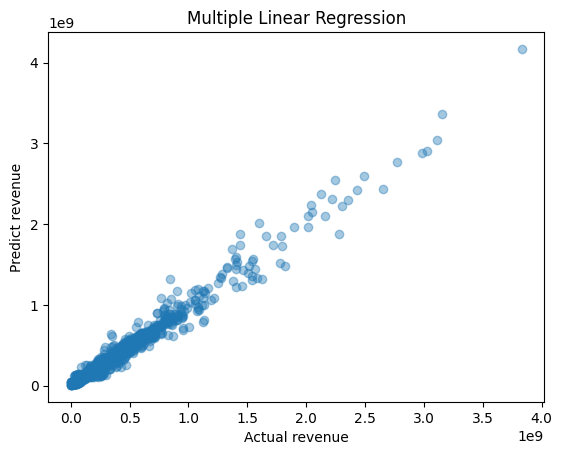

In [60]:
plt.scatter(y_test, y_pred_test, alpha = 0.4)
plt.xlabel('Actual revenue')
plt.ylabel('Predict revenue')
plt.title('Multiple Linear Regression')
plt.show()

### 의사결정나무

In [61]:
from sklearn.tree import DecisionTreeRegressor

# 의사결정나무 회귀 모델 초기화
regressor = DecisionTreeRegressor(random_state=42)

# 의사결정나무 회귀 모델 훈련
regressor.fit(X_train, y_train_boxcox)

# 테스트 세트를 사용하여 예측
y_pred_dt_boxcox = regressor.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_dt = inv_boxcox(y_pred_dt_boxcox, lambda_)

evaluate(y_test, y_pred_dt)

{'MSE': 2663865977233242.5,
 'MAE': 18315838.79474134,
 'R-squared': 0.9857821806883517,
 'RMSE': 51612653.26674499}

In [62]:
mse = mean_squared_error(y_test, y_pred_dt)
print("테스트 세트 MSE:", mse)

테스트 세트 MSE: 2663865977233242.5


### 릿지회귀

In [63]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=1.0, random_state=42)  # alpha는 정규화 강도를 결정하는 매개변수입니다.
ridge_regression.fit(X_train, y_train_boxcox)
y_pred_ridge_boxcox = ridge_regression.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_ridge = inv_boxcox(y_pred_ridge_boxcox, lambda_)

evaluate(y_test, y_pred_ridge)

{'MSE': 4953100095243098.0,
 'MAE': 40766440.38770926,
 'R-squared': 0.9735638794186572,
 'RMSE': 70378264.36651516}

#### GridSearchCV로 최적의 alpha값 찾기

In [64]:
from sklearn.model_selection import GridSearchCV

# Ridge 회귀 모델 객체 생성
ridge_regression = Ridge(random_state=42)

# 탐색할 alpha 값의 후보 리스트 지정
alpha_candidates = np.logspace(-3, 3, 7)  # 10^-3 ~

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=ridge_regression, param_grid={'alpha': alpha_candidates}, scoring='neg_mean_squared_error', cv=5)

# GridSearchCV를 통해 최적의 alpha 값 찾기
grid_search.fit(X_train, y_train_boxcox)

# 최적의 alpha 값 출력
print("최적의 alpha 값:", grid_search.best_params_['alpha'])

최적의 alpha 값: 0.01


In [65]:
ridge_regression = Ridge(alpha=0.001, random_state=42)
ridge_regression.fit(X_train, y_train_boxcox)
y_pred_ridge_grid_boxcox = ridge_regression.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_ridge_grid = inv_boxcox(y_pred_ridge_grid_boxcox, lambda_)

evaluate(y_test, y_pred_ridge_grid)

{'MSE': 4722547692525264.0,
 'MAE': 40214720.99450109,
 'R-squared': 0.974794403938931,
 'RMSE': 68720795.19712548}

### 라쏘회귀

In [66]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.1, random_state=42)  # alpha는 정규화 강도를 결정하는 매개변수입니다.
lasso_regression.fit(X_train, y_train_boxcox)
y_pred_lasso_boxcox = lasso_regression.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_lasso = inv_boxcox(y_pred_lasso_boxcox, lambda_)

evaluate(y_test, y_pred_lasso)

{'MSE': 1.6843585472497048e+16,
 'MAE': 72225545.75344455,
 'R-squared': 0.9101009371886656,
 'RMSE': 129782839.66879846}

### SVM

In [67]:
from sklearn.svm import SVR

# 모델 학습 - 서포트 벡터 머신
svm_regression = SVR(C=1.0, kernel='rbf', gamma='scale')  # C는 오차 허용 범위를 결정하는 매개변수입니다.
svm_regression.fit(X_train, y_train_boxcox)
y_pred_svm_boxcox = svm_regression.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_svm = inv_boxcox(y_pred_svm_boxcox, lambda_)

evaluate(y_test, y_pred_svm)

{'MSE': 4.2151623939714e+16,
 'MAE': 65246040.7420924,
 'R-squared': 0.7750246528956926,
 'RMSE': 205308606.5894803}

### LGBM

In [68]:
# pip install lightgbm

In [69]:
import re

# 학습 데이터와 테스트 데이터로 분할
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X, y, test_size = 0.3, random_state = 1)

def clean_feature_names(X):
    # 특수 문자를 제거하고 언더스코어(_)로 대체합니다.
    X.columns = [re.sub(r'\W+', '_', col) for col in X.columns]
    return X

# 데이터프레임 X의 특성 이름을 정제합니다.
X_train_cleaned = clean_feature_names(X_train_re)
X_test_cleaned = clean_feature_names(X_test_re)

# Box-Cox 변환 적용
y_train_re_boxcox, lambda_ = boxcox(y_train_re + 1)  # +1을 더하는 이유는 음수 값이 없도록 하기 위함
y_test_re_boxcox = boxcox(y_test_re + 1, lmbda=lambda_)

# 변환된 데이터 확인
print("Lambda:", lambda_)
print("Transformed y_train:", y_train_boxcox)
print("Transformed y_test:", y_test_boxcox)

Lambda: 0.15233172438612955
Transformed y_train: [104.37723003 129.81102461 106.55715104 ... 120.22408187 153.62335492
 109.51332052]
Transformed y_test: [150.86756504 113.29497234 128.84246897 ... 132.44595043 155.70962149
 112.47712813]


In [70]:
from lightgbm import LGBMRegressor

# 모델 학습 - LightGBM
lgbm_regression = LGBMRegressor(num_leaves=31, learning_rate=0.1, n_estimators=100, random_state=42)
lgbm_regression.fit(X_train_cleaned, y_train_re_boxcox)
y_pred_lgbm_boxcox = lgbm_regression.predict(X_test_cleaned)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_lgbm = inv_boxcox(y_pred_lgbm_boxcox, lambda_)

evaluate(y_test_re, y_pred_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2494
[LightGBM] [Info] Number of data points in the train set: 2751, number of used features: 121
[LightGBM] [Info] Start training from score 119.313115


{'MSE': 567074824806153.8,
 'MAE': 10795553.76178811,
 'R-squared': 0.9969733584706643,
 'RMSE': 23813332.9209952}

#### GridSearchCV

In [71]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

# LightGBM 모델 정의
lgbm_regression = LGBMRegressor(random_state=42)

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'num_leaves': [15, 31, 50],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=lgbm_regression, param_grid=param_grid, cv=3)

# 모델 학습
grid_search.fit(X_train_cleaned, y_train_re_boxcox)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search.best_params_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2454
[LightGBM] [Info] Number of data points in the train set: 1834, number of used features: 119
[LightGBM] [Info] Start training from score 119.369796
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2456
[LightGBM] [Info] Number of data points in the train set: 1834, number of used features: 119
[LightGBM] [Info] Start training from score 119.076344
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

In [72]:
# 최적의 모델로 예측 수행
best_lgbm_regression = grid_search.best_estimator_
y_pred_lgbm_grid_boxcox = best_lgbm_regression.predict(X_test_cleaned)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_lgbm_grid = inv_boxcox(y_pred_lgbm_grid_boxcox, lambda_)

# 성능 평가
evaluate(y_test, y_pred_lgbm_grid)

{'MSE': 649928261678786.5,
 'MAE': 11404656.23386166,
 'R-squared': 0.9965311458350168,
 'RMSE': 25493690.624913186}

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1212
[LightGBM] [Info] Number of data points in the train set: 220, number of used features: 44
[LightGBM] [Info] Start training from score 428073210.527273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

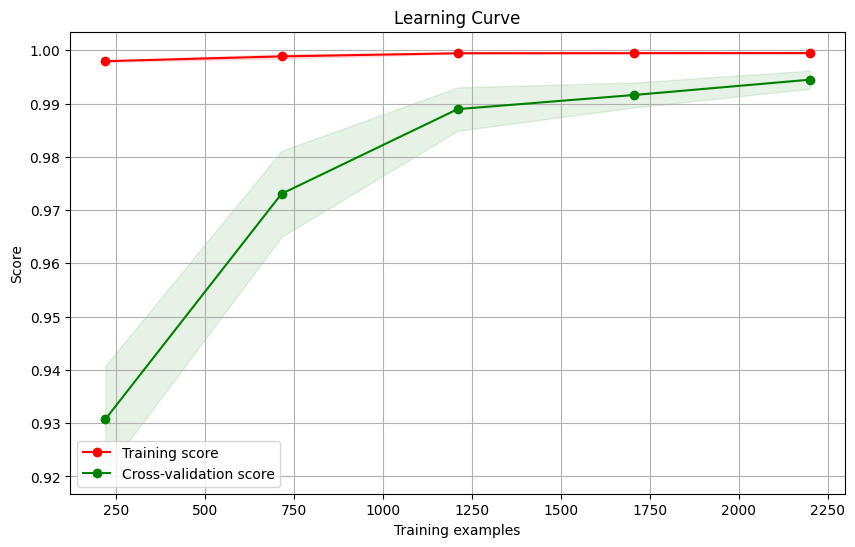

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# estimator: 사용할 모델
# X: 독립 변수
# y: 종속 변수
# cv: 교차 검증 폴드 수 (기본값은 5)
# train_sizes: 학습 데이터 크기의 배열

# 학습 곡선 그리기
plot_learning_curve(best_lgbm_regression, X_train_cleaned, y_train_re)

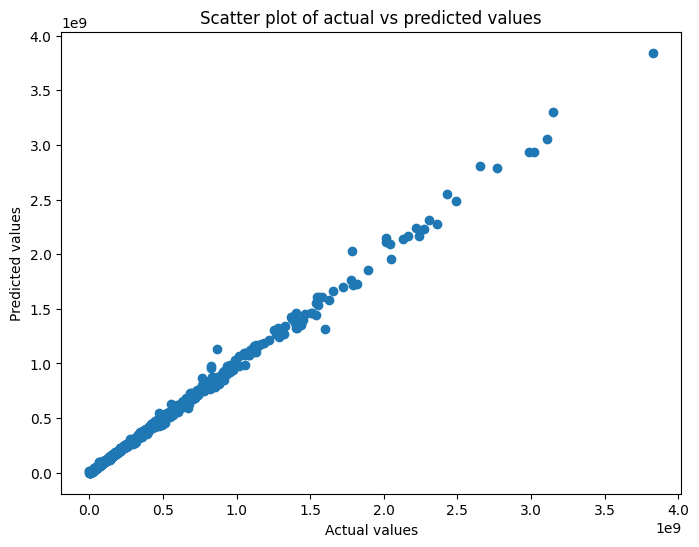

In [74]:
# 실제값과 예측값의 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(y_test_re, y_pred_lgbm)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatter plot of actual vs predicted values")
plt.show()

#### RandomSearchCV

In [75]:
from sklearn.model_selection import RandomizedSearchCV

# 탐색할 하이퍼파라미터 범위 설정
param_dist = {
    'num_leaves': np.arange(10, 100, 10),
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': np.arange(50, 200, 50)
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(estimator=lgbm_regression, param_distributions=param_dist, n_iter=10, cv=3, random_state=42)

# 모델 학습 및 하이퍼파라미터 탐색
random_search.fit(X_train_cleaned, y_train_re_boxcox)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", random_search.best_params_)

# 최적의 모델로 예측 수행
best_lgbm_regression = random_search.best_estimator_
y_pred_lgbm_random_boxcox = best_lgbm_regression.predict(X_test_cleaned)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_lgbm_random = inv_boxcox(y_pred_lgbm_random_boxcox, lambda_)

# 성능 평가
evaluate(y_test, y_pred_lgbm_random)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2454
[LightGBM] [Info] Number of data points in the train set: 1834, number of used features: 119
[LightGBM] [Info] Start training from score 119.369796
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2456
[LightGBM] [Info] Number of data points in the train set: 1834, number of used features: 119
[LightGBM] [Info] Start training from score 119.076344
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

{'MSE': 853303142459422.1,
 'MAE': 11694666.054354792,
 'R-squared': 0.9954456755703038,
 'RMSE': 29211352.972079575}

### 다층 신경망 MLP

In [76]:
from sklearn.neural_network import MLPRegressor

# 모델 학습 - 신경망
nn_regression = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)
nn_regression.fit(X_train, y_train_boxcox)
y_pred_nn_boxcox = nn_regression.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_nn = inv_boxcox(y_pred_nn_boxcox, lambda_)

evaluate(y_test, y_pred_nn)

{'MSE': 165849507395179.03,
 'MAE': 7357392.235930806,
 'R-squared': 0.999114813451869,
 'RMSE': 12878257.156742096}

#### GridSearchCV - 최종모델

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor

# 신경망 모델 정의
nn_regression = MLPRegressor(max_iter=1000, random_state=42)

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd']
}

# GridSearchCV 객체 생성
grid_search_nn = GridSearchCV(estimator=nn_regression, param_grid=param_grid, cv=3)

# 모델 학습 및 최적의 하이퍼파라미터 탐색
grid_search_nn.fit(X_train, y_train_boxcox)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search_nn.best_params_)

# 최적의 모델로 예측 수행
best_nn_regression = grid_search_nn.best_estimator_
y_pred_nn_grid_boxcox = best_nn_regression.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_nn_grid = inv_boxcox(y_pred_nn_grid_boxcox, lambda_)

# 성능 평가
evaluate(y_test, y_pred_nn_grid)

Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (100,), 'solver': 'sgd'}


{'MSE': 209782750504986.62,
 'MAE': 6190846.353749388,
 'R-squared': 0.9988803290905505,
 'RMSE': 14483878.986824857}

#### train 데이터 성능평가

In [78]:
y_train_pred_nn_grid_boxcox = best_nn_regression.predict(X_train)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_train_pred_nn_grid = inv_boxcox(y_train_pred_nn_grid_boxcox, lambda_)

# 성능 평가
evaluate(y_train, y_train_pred_nn_grid)

{'MSE': 42025472029293.15,
 'MAE': 3589308.061708504,
 'R-squared': 0.9998443433016795,
 'RMSE': 6482705.610259743}

#### learning curve

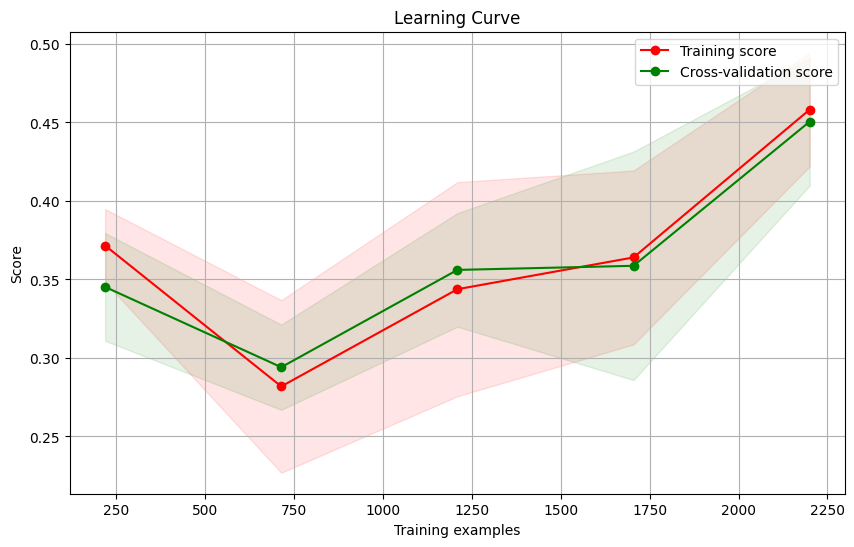

In [79]:
def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# estimator: 사용할 모델
# X: 독립 변수
# y: 종속 변수
# cv: 교차 검증 폴드 수 (기본값은 5)
# train_sizes: 학습 데이터 크기의 배열
plot_learning_curve(best_nn_regression, X_train, y_train)

#### GridSearchCV 성능 향상

In [80]:
# 신경망 모델 정의
nn_regression_layer = MLPRegressor(max_iter=1000, random_state=42)

# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'hidden_layer_sizes': [(200,), (250,), (300,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd']
}

# GridSearchCV 객체 생성
grid_search_nn_layer = GridSearchCV(estimator=nn_regression_layer, param_grid=param_grid, cv=3)

# 모델 학습 및 최적의 하이퍼파라미터 탐색
grid_search_nn_layer.fit(X_train, y_train_boxcox)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search_nn_layer.best_params_)

# 최적의 모델로 예측 수행
best_nn_regression_layer = grid_search_nn_layer.best_estimator_
y_pred_nn_grid_layer_boxcox = best_nn_regression_layer.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_nn_grid_layer = inv_boxcox(y_pred_nn_grid_layer_boxcox, lambda_)

# 성능 평가
evaluate(y_test, y_pred_nn_grid_layer)

Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (250,), 'solver': 'sgd'}


{'MSE': 80011939579151.39,
 'MAE': 4853137.313961571,
 'R-squared': 0.9995729532531166,
 'RMSE': 8944939.327863067}

In [89]:
from sklearn.model_selection import cross_val_score

# GridSearchCV 객체 생성
grid_search_nn_layer = GridSearchCV(estimator=nn_regression_layer, param_grid=param_grid, cv=3)

# 모델 학습 및 최적의 하이퍼파라미터 탐색
grid_search_nn_layer.fit(X_train, y_train_boxcox)

# 교차 검증을 통한 성능 추정
cross_val_scores = cross_val_score(grid_search_nn_layer, X_train, y_train_boxcox, cv=3)

# 교차 검증 성능 출력
print("Cross Validation Scores:", cross_val_scores)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search_nn_layer.best_params_)

# 최적의 모델로 예측 수행
best_nn_regression_layer = grid_search_nn_layer.best_estimator_
y_pred_nn_grid_layer_boxcox = best_nn_regression_layer.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_nn_grid_layer = inv_boxcox(y_pred_nn_grid_layer_boxcox, lambda_)

# 성능 평가
evaluate(y_test, y_pred_nn_grid_layer)


Cross Validation Scores: [0.9976379  0.99772748 0.99840184]
Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (250,), 'solver': 'sgd'}


{'MSE': 80011939579151.39,
 'MAE': 4853137.313961571,
 'R-squared': 0.9995729532531166,
 'RMSE': 8944939.327863067}

#### test 데이터 성능 평가

In [90]:
y_train_pred_nn_grid_layer_boxcox = best_nn_regression_layer.predict(X_train)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_train_pred_nn_grid_layer = inv_boxcox(y_train_pred_nn_grid_layer_boxcox, lambda_)

# 성능 평가
evaluate(y_train, y_train_pred_nn_grid_layer)

{'MSE': 23904287156497.7,
 'MAE': 2863378.757923827,
 'R-squared': 0.9999114617341622,
 'RMSE': 4889201.075482343}

#### RandomSearchCV

In [82]:
# MLPRegressor 모델 정의
mlp_regression = MLPRegressor(random_state=1)

# 탐색할 하이퍼파라미터 범위 설정
param_distributions = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(estimator=mlp_regression, param_distributions=param_distributions,
                                   n_iter=10, cv=3, random_state=1)

# 모델 학습
random_search.fit(X_train, y_train_boxcox)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", random_search.best_params_)

# 최적의 모델로 예측 수행
best_mlp_regression = random_search.best_estimator_
y_pred_mlp_random_boxcox = best_mlp_regression.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_mlp_random = inv_boxcox(y_pred_mlp_random_boxcox, lambda_)

# 성능 평가
evaluate(y_test, y_pred_mlp_random)

Best Hyperparameters: {'solver': 'sgd', 'hidden_layer_sizes': (150,), 'activation': 'tanh'}


{'MSE': 228922336014665.06,
 'MAE': 7983161.34661222,
 'R-squared': 0.9987781756148117,
 'RMSE': 15130179.642511357}

#### train 데이터 성능평가

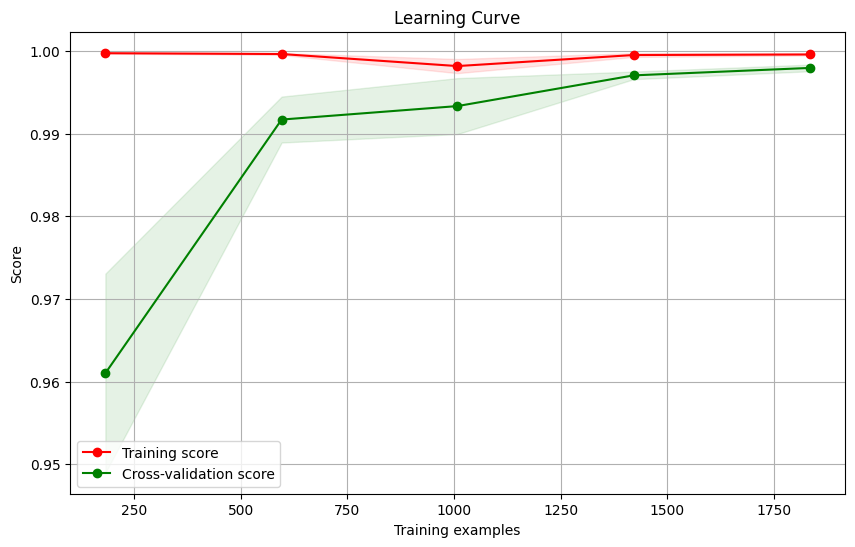

In [91]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# 학습 곡선 계산
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_nn_regression_layer, X=X_train, y=y_train_boxcox, cv=3)

# 평균 및 표준 편차 계산
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# 훈련 세트 점수 그리기
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")

# 검증 세트 점수 그리기
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

# 범례 추가
plt.legend(loc="best")
plt.show()


In [83]:
y_train_pred_mlp_random_boxcox = best_mlp_regression.predict(X_train)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_train_pred_mlp_random = inv_boxcox(y_train_pred_mlp_random_boxcox, lambda_)

# 성능 평가
evaluate(y_train, y_train_pred_mlp_random)

{'MSE': 129186038411110.12,
 'MAE': 6465113.85998694,
 'R-squared': 0.9995215122820233,
 'RMSE': 11366003.625334198}

#### learning curve

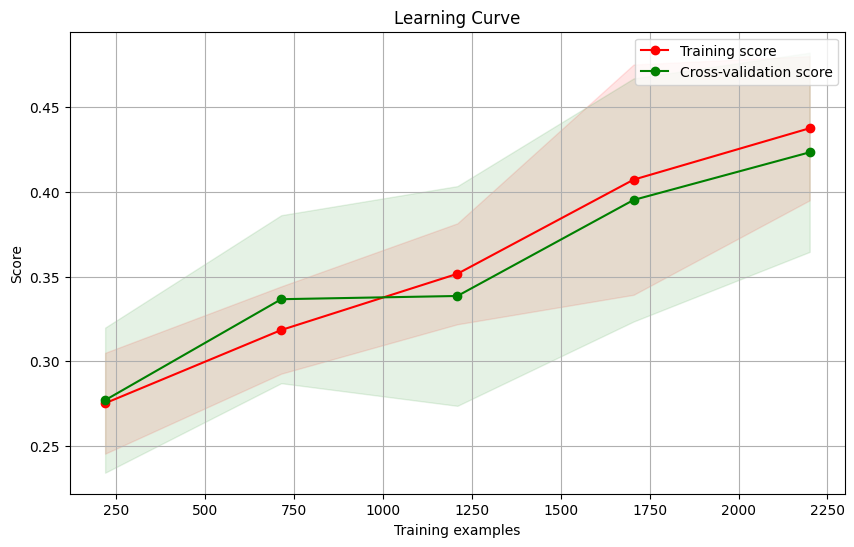

In [84]:
def plot_learning_curve(estimator, X, y, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

# estimator: 사용할 모델
# X: 독립 변수
# y: 종속 변수
# cv: 교차 검증 폴드 수 (기본값은 5)
# train_sizes: 학습 데이터 크기의 배열
plot_learning_curve(best_mlp_regression, X_train, y_train)

#### RandomSearchCV 은닉층 수 줄이기

In [85]:
from scipy.stats import uniform

# MLPRegressor 모델 정의
mlp_regression = MLPRegressor(random_state=1)

# 탐색할 하이퍼파라미터 범위 설정
param_distributions = {
    'hidden_layer_sizes':  [(10,), (25,), (50,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    # 'alpha': uniform(0.0001, 0.1)  # L2 규제 (릿지)
    'alpha': uniform(0.0001, 0.1),  # L1 규제 (라쏘)
}

# RandomizedSearchCV 객체 생성
random_search = RandomizedSearchCV(estimator=mlp_regression, param_distributions=param_distributions,
                                   n_iter=10, cv=3, random_state=1)

# 모델 학습
random_search.fit(X_train, y_train_boxcox)

# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", random_search.best_params_)

# 최적의 모델로 예측 수행
best_mlp_regression = random_search.best_estimator_
y_pred_mlp_random_boxcox = best_mlp_regression.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_mlp_random = inv_boxcox(y_pred_mlp_random_boxcox, lambda_)

# 성능 평가
evaluate(y_test, y_pred_mlp_random)

Best Hyperparameters: {'activation': 'relu', 'alpha': 0.08017445686755367, 'hidden_layer_sizes': (25,), 'solver': 'adam'}


{'MSE': 1.0589487830990104e+16,
 'MAE': 49976483.93114218,
 'R-squared': 0.9434808560675823,
 'RMSE': 102905237.1407311}

#### train 데이터 성능평가

In [86]:
y_train_pred_mlp_random_2_boxcox = best_mlp_regression.predict(X_train)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_train_pred_mlp_random_2 = inv_boxcox(y_train_pred_mlp_random_2_boxcox, lambda_)

# 성능 평가
evaluate(y_train, y_train_pred_mlp_random_2)

{'MSE': 1.5165016211656346e+16,
 'MAE': 52941750.334491424,
 'R-squared': 0.9438308187986806,
 'RMSE': 123146320.33339992}

### 랜덤포레스트

In [87]:
from sklearn.ensemble import RandomForestRegressor

# 랜덤 포레스트 회귀 모델 초기화
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=1)

# 모델 훈련
rf_regressor.fit(X_train, y_train_boxcox)

# 테스트 세트를 사용하여 예측
y_pred_rf_boxcox = rf_regressor.predict(X_test)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_rf = inv_boxcox(y_pred_rf_boxcox, lambda_)

evaluate(y_test, y_pred_rf)

{'MSE': 850497173412354.9,
 'MAE': 11089031.076527547,
 'R-squared': 0.9954606518345928,
 'RMSE': 29163284.68146815}

#### train데이터 성능 평가

In [88]:
y_train_pred_rf_boxcox = rf_regressor.predict(X_train)

# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_train_pred_rf = inv_boxcox(y_train_pred_rf_boxcox, lambda_)

# 성능 평가
evaluate(y_train, y_train_pred_rf)

{'MSE': 176148126359325.72,
 'MAE': 4722042.903160778,
 'R-squared': 0.9993475710220379,
 'RMSE': 13272080.709494112}

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from scipy.special import inv_boxcox
# 신경망 모델 정의
nn_regression_layer = MLPRegressor(max_iter=1000, random_state=42)
# 탐색할 하이퍼파라미터 범위 설정
param_grid = {
    'hidden_layer_sizes': [(200,), (250,), (300,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01]  # L1 규제의 강도 조절을 위한 alpha 값
}
# GridSearchCV 객체 생성
grid_search_nn_layer = GridSearchCV(estimator=nn_regression_layer, param_grid=param_grid, cv=3)
# 모델 학습 및 최적의 하이퍼파라미터 탐색
grid_search_nn_layer.fit(X_train, y_train_boxcox)
# 최적의 하이퍼파라미터 출력
print("Best Hyperparameters:", grid_search_nn_layer.best_params_)
# 최적의 모델로 예측 수행
best_nn_regression_layer = grid_search_nn_layer.best_estimator_
y_pred_nn_grid_layer_boxcox = best_nn_regression_layer.predict(X_test)
# 예측 결과를 원래의 스케일로 되돌리기 위해 역 Box-Cox 변환 적용
y_pred_nn_grid_layer = inv_boxcox(y_pred_nn_grid_layer_boxcox, lambda_)
# 성능 평가
evaluate(y_test, y_pred_nn_grid_layer)